# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [91]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [93]:
!wget  -O 'train.csv' -q 'https://www.dropbox.com/s/en5f9nhn915cnkf/_train.csv?dl=0'

In [94]:
df = pd.read_csv("train.csv")
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [95]:
df.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [96]:
print(df.shape)
df = df.drop(columns=["dropoff_datetime"])
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors="coerce")
assert "dropoff_datetime" not in list(df.columns)

(1458644, 11)
(1458644, 11)


В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

<Axes: xlabel='trip_duration', ylabel='Count'>

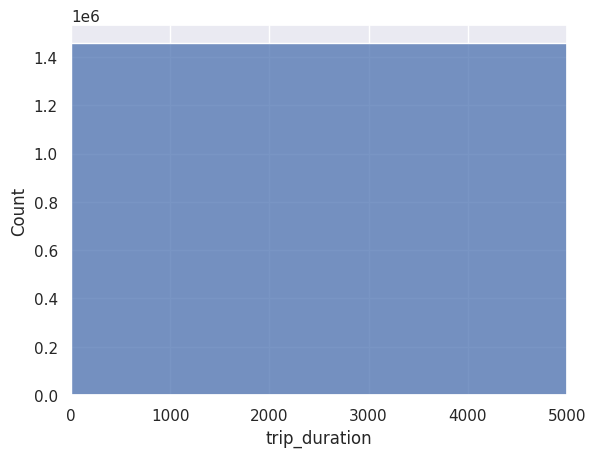

<Axes: xlabel='trip_duration', ylabel='Count'>

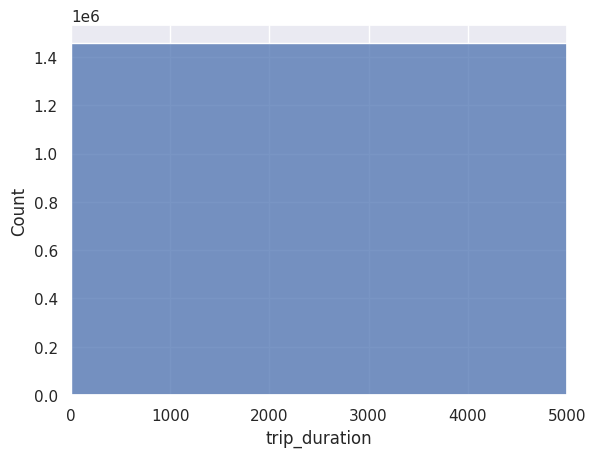

In [97]:
# plt.xlim(0, 5000)
sns.histplot(x="trip_duration", data=df, bins=20)

<Axes: xlabel='trip_duration', ylabel='Count'>

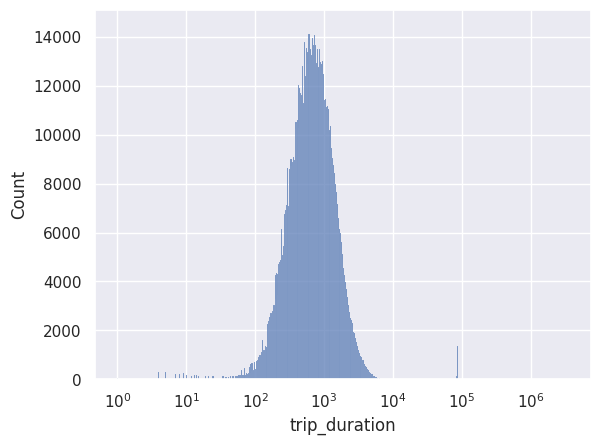

<Axes: xlabel='trip_duration', ylabel='Count'>

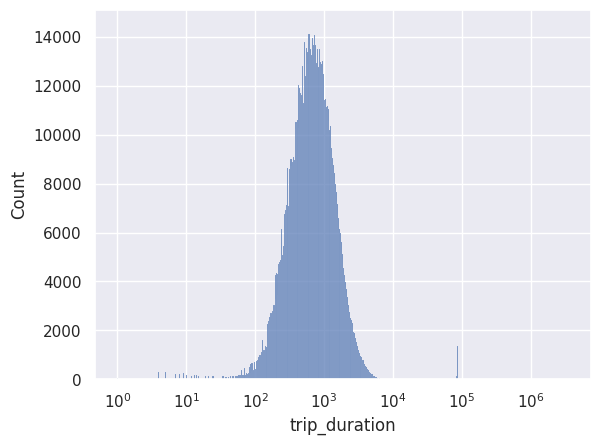

In [98]:
plt.xscale("log")
sns.histplot(x="trip_duration", data=df)

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

*Ответ*: Распределение лог-нормальное, имеет очень тяжелый хвост справа, правая асимметрия. В среднем поездка занимает 500-600 секунд. Имеются выбросы, как например $10^5 сек \approx 27 часов$. Минимум где-то на 10 секундах, максимум на 27 часах.

In [99]:
(10 ** 5) / 60**2

27.77777777777778

27.77777777777778

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

*Ответ*: Потому что логарифм таргета распределен нормально (Лог-нормальное распределение). RMSLE очень профитно использовать с skewed распределениями. Как показано выше на графике логарифмизация превращает распределение с тяжелым хвостом в нормальное распределение, следовательно ошибки ожидаются быть нормально-распределенными, следовательно, мы можем лучше понять, хорошие ли коэффициенты мы нашли для линейной регрессии.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:
\begin{align}
RMSLE&= \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}         \\
e^{\hat{a}(x_{i})}-1 &= a(x_{i}) \implies  \hat{a}(x_{i}) = \ln (1+a(x_{i})) \text{ substitute it in MSE:}  \\
MSE&=\frac{1}{\ell}\sum_{i=1}^{\ell}(\hat{y_{i}} - \hat{a_{i}})^2 = \frac{1}{\ell} \sum_{i=1}^{\ell}(\log(y_{i}+1) - \log(1+a(x_{i}))^2  \\
min(MSE) &= min(\sqrt{ MSE })
\end{align}


Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

<Axes: xlabel='log_trip_duration', ylabel='Count'>

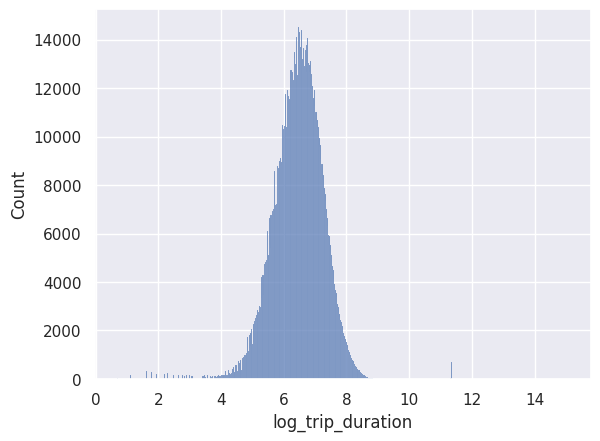

<Axes: xlabel='log_trip_duration', ylabel='Count'>

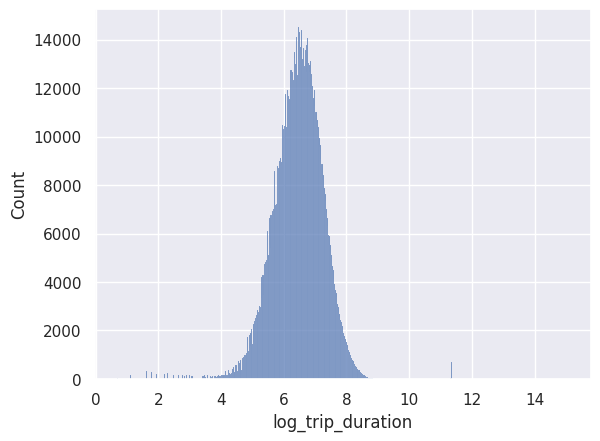

In [100]:
df["log_trip_duration"] = np.log1p(df["trip_duration"])
df = df.drop(columns=["trip_duration"])

sns.histplot(data=df, x="log_trip_duration")

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [101]:
from sklearn.metrics import mean_squared_error

# раз уж я убедил себя, что MSE(log(y)) то же, что RMSLE(y),
# будем делать через MSE
y = df.log_trip_duration  # фактически log(y+1)
const = y.mean()

def rmsle(log1p_y_true, log1p_y_pred):
    # RSS = mean_squared_error(log1p_y_true, log1p_y_pred)
    RSS = np.sum(np.power((log1p_y_true-log1p_y_pred), 2))
    return np.sqrt(RSS / len(y))

rmsle_best_const = rmsle(np.full((len(y)), const), y)
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

#0.7957592365411509

0.7957592365411509
0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

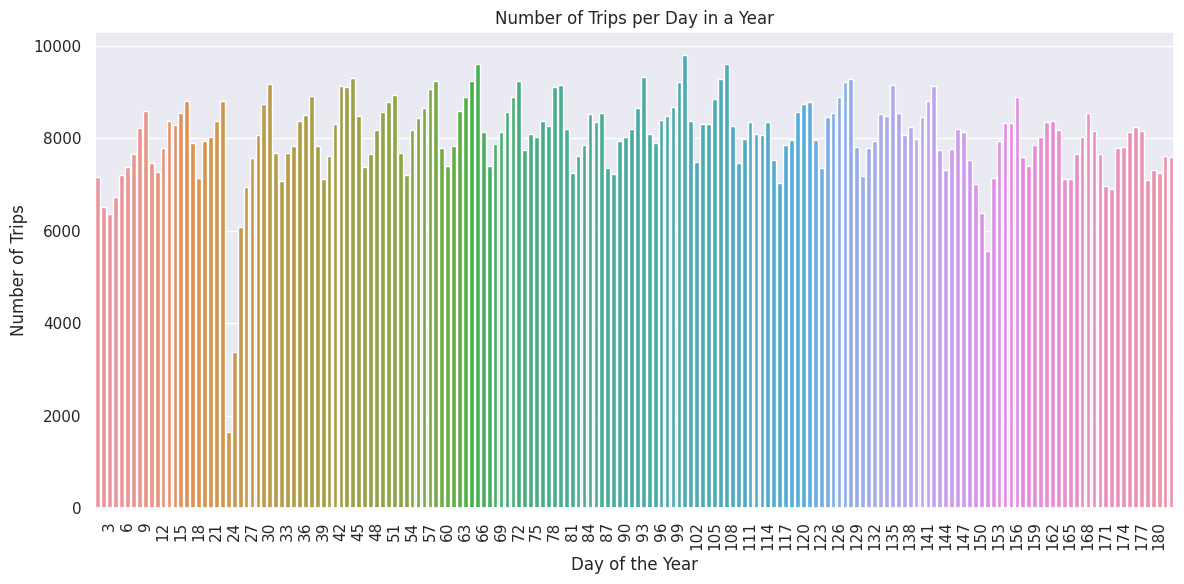

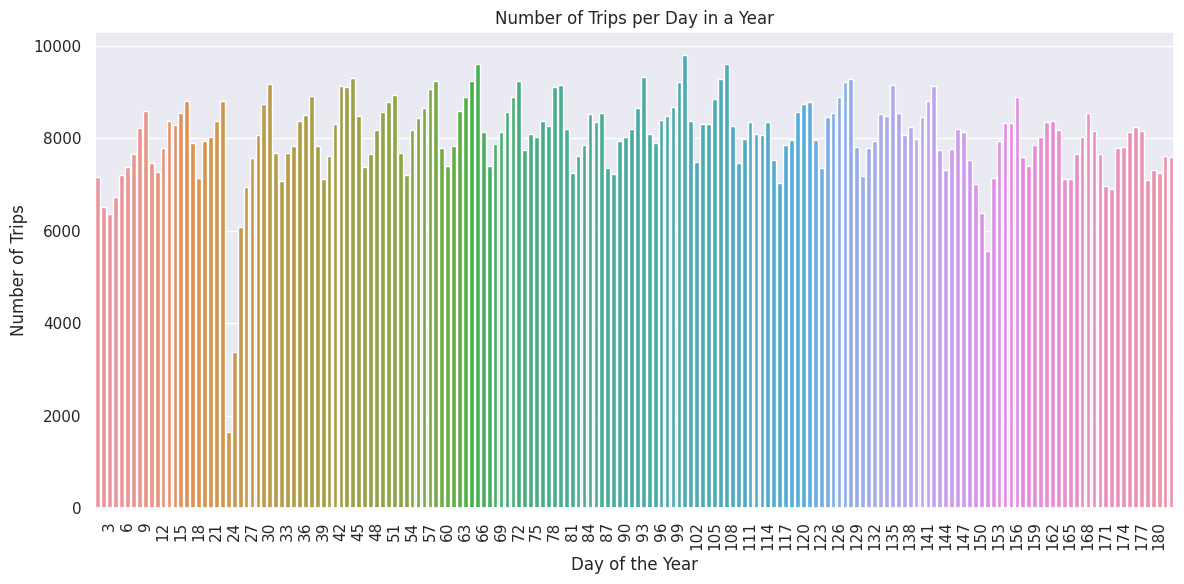

In [102]:
# df.head()

df["pickup_date"] = df["pickup_datetime"].dt.dayofyear

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='pickup_date')
plt.xlabel('Day of the Year')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Day in a Year')

# Get the x-tick labels
labels = ax.get_xticklabels()

# Modify the labels to show only numbers divisible by 3
new_labels = [int(float(label.get_text())) if int(float(label.get_text())) % 3 == 0 else '' for label in labels]

# Set the modified labels on the x-axis
ax.set_xticklabels(new_labels)

plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.tight_layout()  # Adjust spacing to prevent label overlaps
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

*Ответ*: <br>January 2016 United States blizzard <br> Rain probably https://www.weather.gov/okx/storm05302016

In [103]:
count_day = df.groupby(["pickup_date"]).size()
unpopular_days = count_day.nsmallest(7).sort_index()
print(f"Lowest 7 days: {unpopular_days}")

def get_full_time(df, i):
    return df[df["pickup_date"] == unpopular_days.index[i]]["pickup_datetime"].iloc[0]

print("\n")
for i in range(5):
    print(get_full_time(df, i))

count_day = count_day.reset_index(name="rides_per_day")
df = df.merge(count_day, on="pickup_date")

Lowest 7 days: pickup_date
2      6512
3      6353
23     1648
24     3383
25     6084
150    6372
151    5570
dtype: int64


2016-01-02 15:41:11
2016-01-03 16:59:02
2016-01-23 08:46:42
2016-01-24 20:35:19
2016-01-25 23:32:14
Lowest 7 days: pickup_date
2      6512
3      6353
23     1648
24     3383
25     6084
150    6372
151    5570
dtype: int64


2016-01-02 15:41:11
2016-01-03 16:59:02
2016-01-23 08:46:42
2016-01-24 20:35:19
2016-01-25 23:32:14


In [104]:
df["day_of_week"] = df["pickup_datetime"].dt.day_of_week
df["hour"] = df["pickup_datetime"].dt.hour
df["month"] = df["pickup_datetime"].dt.month

Text(-1.9305555555555483, 0.5, 'Number of rides this day')

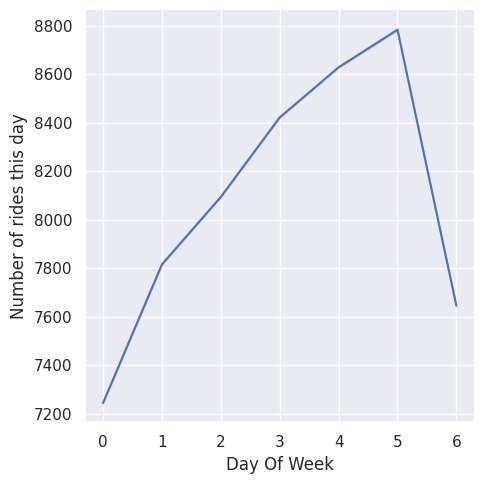

Text(-1.9305555555555483, 0.5, 'Number of rides this day')

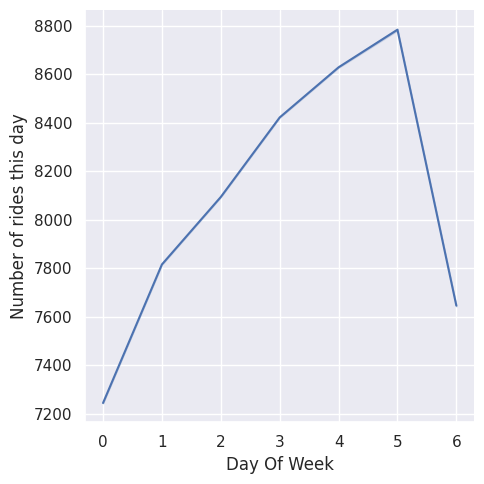

In [105]:
sns.relplot(data=df, x="day_of_week", y="rides_per_day", kind="line")
plt.xlabel("Day Of Week")
plt.ylabel("Number of rides this day")

Text(-1.8055555555555483, 0.5, 'Number of rides this hour')

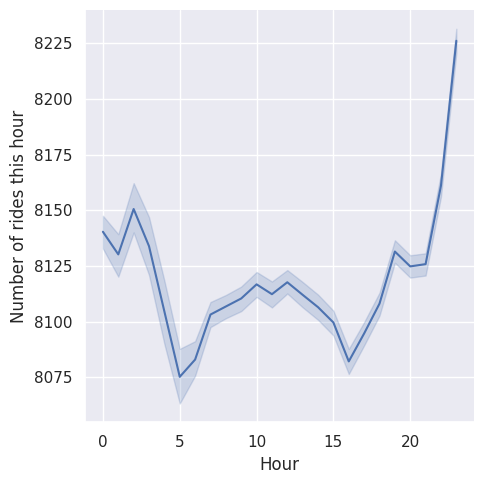

Text(-1.8055555555555483, 0.5, 'Number of rides this hour')

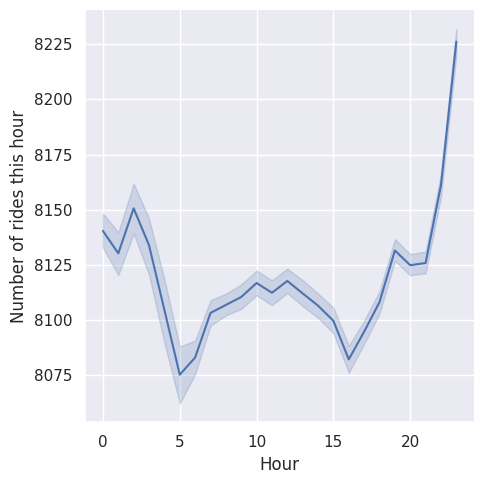

In [106]:
sns.relplot(data=df, x="hour", y="rides_per_day",kind = 'line')
plt.xlabel("Hour")
plt.ylabel("Number of rides this hour")

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

Text(48.343656249999995, 0.5, 'Number of rides this day')

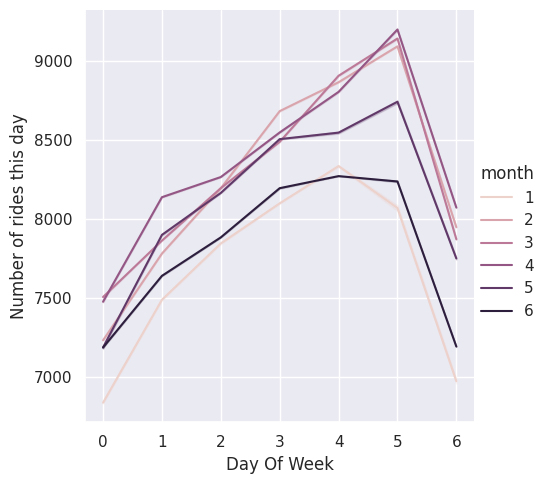

Text(48.343656249999995, 0.5, 'Number of rides this day')

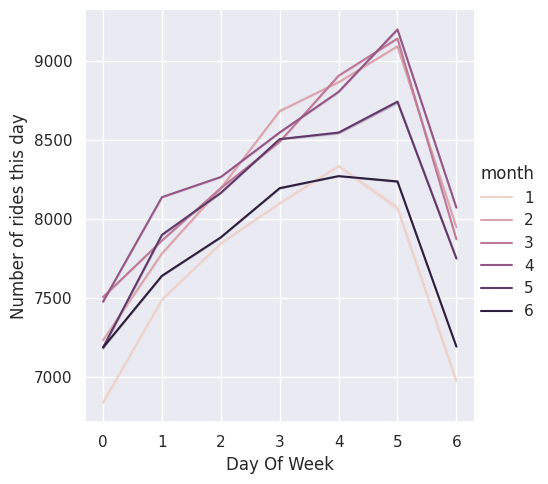

In [107]:
sns.relplot(data=df, x="day_of_week", y="rides_per_day", kind="line", hue="month")
plt.xlabel("Day Of Week")
plt.ylabel("Number of rides this day")

Text(48.343656249999995, 0.5, 'Number of rides this day')

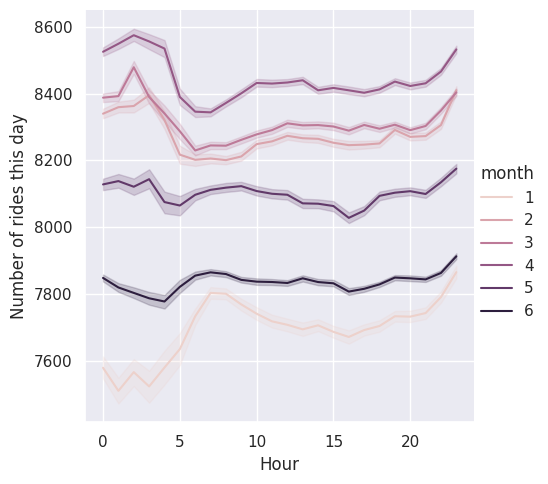

Text(48.343656249999995, 0.5, 'Number of rides this day')

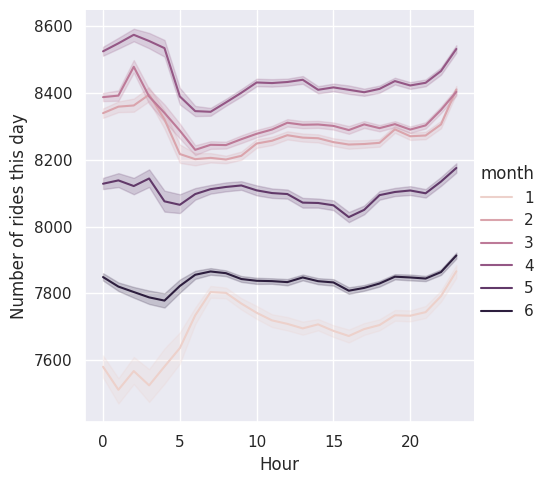

In [108]:
sns.relplot(data=df, x="hour", y="rides_per_day", kind="line", hue="month")
plt.xlabel("Hour")
plt.ylabel("Number of rides this day")

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

*Ответ*: дни недели - мало поездок:
*   понедельник
*   воскресенье<br>много поездок:


*  Пятница
*  Суббота

<br> месяца:


*   в первый месяц мало кто ездеет, вероятно из-за снегов.
*   в летние месяцы мало кто ездеет, возможно потому что все отдыхают от дел

<br> часы:


*   в 22-23 часа люди напиваются и поэтому уезжают, также просто не безопасно ходить по улицам. до 3-х ночи тоже много вызывают по похожим причинам
*   в 5 утра и 16 часов дня меньше всего поездок, люди спят или работают










**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [109]:
display(df[df.isna().any(axis=1)])
df = df.drop(labels=2860, axis=0)
display(df[df.isna().any(axis=1)])

#id3628732

Empty DataFrame
Columns: [id, vendor_id, pickup_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, log_trip_duration, pickup_date, rides_per_day, day_of_week, hour, month]
Index: []

Empty DataFrame
Columns: [id, vendor_id, pickup_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, log_trip_duration, pickup_date, rides_per_day, day_of_week, hour, month]
Index: []

Empty DataFrame
Columns: [id, vendor_id, pickup_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, log_trip_duration, pickup_date, rides_per_day, day_of_week, hour, month]
Index: []

Empty DataFrame
Columns: [id, vendor_id, pickup_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, log_trip_duration, pickup_date, rides_per_day, day_of_week, hour, month]
Index: []

In [110]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="log_trip_duration"), df["log_trip_duration"], test_size=0.3, random_state=42)

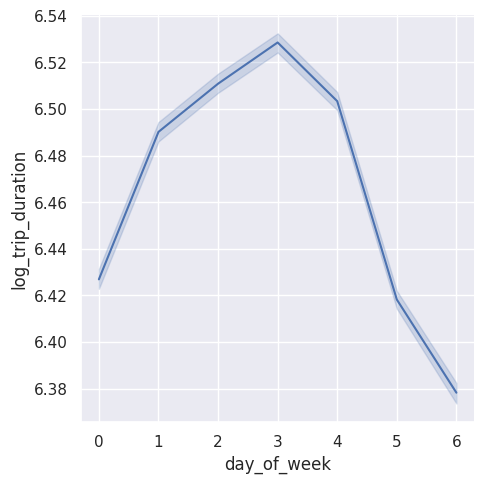

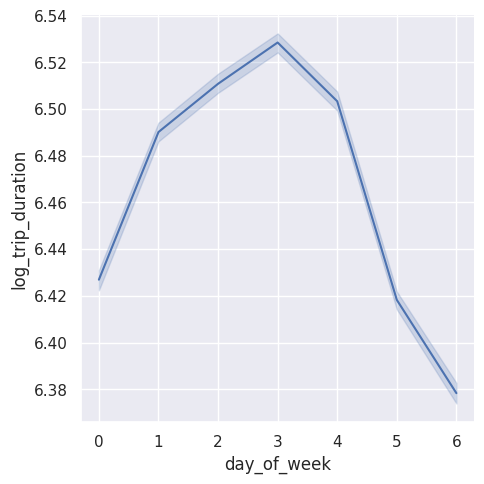

In [111]:
# kind = line takes mean automatically
sns.relplot(x=X_train["day_of_week"], y=y_train, kind="line")

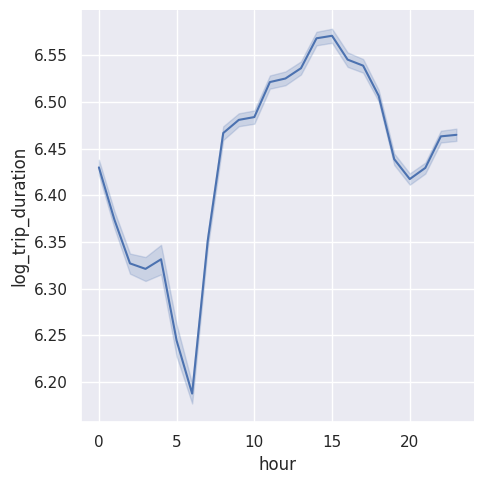

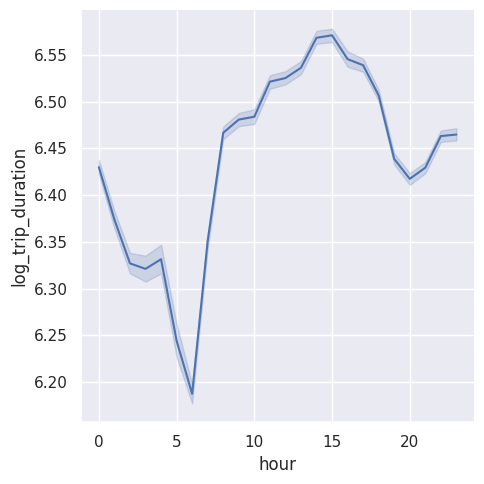

In [112]:
# kind = line takes mean automatically
sns.relplot(x=X_train["hour"], y=y_train, kind="line")

Text(0.5, 1.0, 'Log Length of Trips per Day in a Year')

<Figure size 1200x600 with 0 Axes>

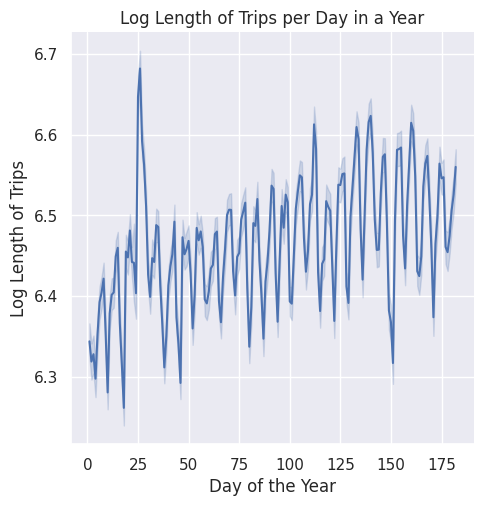

Text(0.5, 1.0, 'Log Length of Trips per Day in a Year')

<Figure size 1200x600 with 0 Axes>

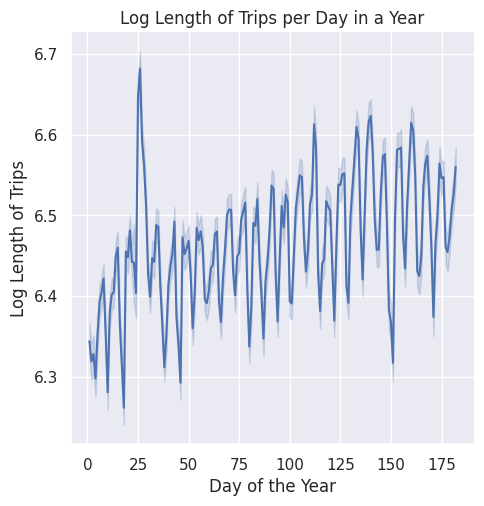

In [113]:
# df.head()

plt.figure(figsize=(12, 6))
ax = sns.relplot(y=y_train, x=X_train['pickup_date'], kind="line")
plt.xlabel('Day of the Year')
plt.ylabel('Log Length of Trips')
plt.title('Log Length of Trips per Day in a Year')

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

<br>
*Ответ*: График дня имеет похожие низкие точки: понедельник и воскресенье. График часа похож до 12 часов, а после отличается. После 12 часов продолжительность начинает расти, а количество поездок падает. В снежные дни долго едут такси, тк снежная дорога замедляет и создает пробки. 29-30 мая сложно найти инфу. чем ближе к лету, тем дольше поездки становятся.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [114]:
def featurize(df: pd.DataFrame):
    anomaly_days_of_year = [23, 150]
    features_to_drop = ["id", "day_of_week", "pickup_date", "pickup_datetime"]

    dt = df["pickup_datetime"].dt
    df["weekday"] = dt.dayofweek
    df["month"] = dt.month
    df["hour"] = dt.hour
    df["dayofyear"] = dt.dayofyear
    df["anomaly_date"] = df["dayofyear"].isin(anomaly_days_of_year)

    df.drop(columns=features_to_drop, inplace=True)
    return df

featurize(X_train)
featurize(X_test).head()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
67251            2                1        -73.953575        40.766853   
1397037          1                1        -73.980736        40.742550   
1021088          1                1        -74.000076        40.743023   
951425           1                1        -73.989616        40.762753   
707883           1                1        -73.971497        40.755978   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
67251           -73.983360         40.761688                  N   
1397037         -73.986183         40.741192                  N   
1021088         -73.987762         40.765083                  N   
951425          -73.992088         40.744026                  N   
707883          -73.960808         40.769615                  N   

         rides_per_day  hour  month  weekday  dayofyear  anomaly_date  
67251             7530    13      5        4        148         False  
1397037           8896    15      5        3        126         False  
1021088           7084     0      6        6        178         False  
951425            8138     6      3        6         66         False  
707883            7821    17      2        6         38         False

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
67251            2                1        -73.953575        40.766853   
1397037          1                1        -73.980736        40.742550   
1021088          1                1        -74.000076        40.743023   
951425           1                1        -73.989616        40.762753   
707883           1                1        -73.971497        40.755978   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
67251           -73.983360         40.761688                  N   
1397037         -73.986183         40.741192                  N   
1021088         -73.987762         40.765083                  N   
951425          -73.992088         40.744026                  N   
707883          -73.960808         40.769615                  N   

         rides_per_day  hour  month  weekday  dayofyear  anomaly_date  
67251             7530    13      5        4        148         False  
1397037           8896    15      5        3        126         False  
1021088           7084     0      6        6        178         False  
951425            8138     6      3        6         66         False  
707883            7821    17      2        6         38         False

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

<br> *Ответ*: категориальные ["store_and_fwd_flag", "weekday", "hour", "month", "anomaly_date"], остальные как нумерические. store_and_fwd_flag это bool, weekday это число в датасете, но по факту это день недели (пн, вт) а не число. hour - число, но эта переменная просто ведет себя вообще не-линейно, проще для модели регрессии считать это категорией, месяц - категория, потому что есть набор для этой категории - разные месяца. аномалия - bool. в общем-то для всех этих переменных есть какой-то свой набор переменных, что является хорошим определением переменной. Остальные переменные либо можно измерить, либо они отображают численную переменную, а не участника множества. week_of_year я тоже кинул в числовую переменную, хоть это по определению и категориальная, я заметил, что есть монотонный рост таргета, поэтому эта переменная может хорошо сойти за численную

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [115]:
X_train.sample()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
1455367          2                2        -74.007195        40.727524   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
1455367         -73.994888         40.750061                  N   

         rides_per_day  hour  month  weekday  dayofyear  anomaly_date  
1455367           8389    14      4        1         96         False

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
1455367          2                2        -74.007195        40.727524   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
1455367         -73.994888         40.750061                  N   

         rides_per_day  hour  month  weekday  dayofyear  anomaly_date  
1455367           8389    14      4        1         96         False

In [116]:
from sklearn.metrics import mean_squared_error

def score_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE : {rmse}")

    metrics = []
    for m in metrics:
        print(f'{m=}'.split('=')[0], f": {m(y_test, y_pred)}")

    print(f"\n for data with Mean, std: {y_test.mean(), y_test.std()}")

    return y_pred, rmse

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge

assert list(X_train.columns) == list(X_test.columns)

categorical_features = ["store_and_fwd_flag", "weekday", "hour", "month", "anomaly_date"]
numerical_features = X_train.drop(columns=categorical_features).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features)
    ]
)

model_1 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge())
    ]
)

model_1.fit(X_train, y_train)
_ = score_model(model_1, X_test, y_test)

RMSE : 0.7693735187548758

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.7693735187548758

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [118]:
from folium.plugins import MousePosition

def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"

    MousePosition(
        position="topright",
        separator=" | ",
        empty_string="NaN",
        lng_first=True,
        num_digits=20,
        prefix="Coordinates:",
        lat_formatter=formatter,
        lng_formatter=formatter,
    ).add_to(m)

    return m

In [119]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [120]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

*Ответ:*


*   Аэропорт Элизабет (долгая поездка)
*   Аэропорт Кеннеди (долгая поездка)
*   SeaPlane Base аэропорт (долгая поездка)

В этих точках происходят длинные поездки, которые могут быть outlier"ами





**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [121]:
!pip install -q haversine

In [122]:
import haversine as hs

# pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude

def get_haversine_col(df):

    def calc_hav(plong, plat, dlong, dlat):
        loc1 = (plong, plat)[::-1]
        loc2 = (dlong, dlat)[::-1]
        return hs.haversine(loc1, loc2)

    # df["haversine"] = df.apply(calc_hav, axis=1)
    df["haversine"] = np.vectorize(calc_hav)(
        df["pickup_longitude"],
        df["pickup_latitude"],
        df["dropoff_longitude"],
        df["dropoff_latitude"]
    )
    return df

get_haversine_col(X_train)
get_haversine_col(X_test).head()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
67251            2                1        -73.953575        40.766853   
1397037          1                1        -73.980736        40.742550   
1021088          1                1        -74.000076        40.743023   
951425           1                1        -73.989616        40.762753   
707883           1                1        -73.971497        40.755978   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
67251           -73.983360         40.761688                  N   
1397037         -73.986183         40.741192                  N   
1021088         -73.987762         40.765083                  N   
951425          -73.992088         40.744026                  N   
707883          -73.960808         40.769615                  N   

         rides_per_day  hour  month  weekday  dayofyear  anomaly_date  \
67251             7530    13      5        4        148         False   
1397037           8896    15      5        3        126         False   
1021088           7084     0      6        6        178         False   
951425            8138     6      3        6         66         False   
707883            7821    17      2        6         38         False   

         haversine  
67251     2.573397  
1397037   0.483136  
1021088   2.663283  
951425    2.092662  
707883    1.763506

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
67251            2                1        -73.953575        40.766853   
1397037          1                1        -73.980736        40.742550   
1021088          1                1        -74.000076        40.743023   
951425           1                1        -73.989616        40.762753   
707883           1                1        -73.971497        40.755978   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
67251           -73.983360         40.761688                  N   
1397037         -73.986183         40.741192                  N   
1021088         -73.987762         40.765083                  N   
951425          -73.992088         40.744026                  N   
707883          -73.960808         40.769615                  N   

         rides_per_day  hour  month  weekday  dayofyear  anomaly_date  \
67251             7530    13      5        4        148         False   
1397037           8896    15      5        3        126         False   
1021088           7084     0      6        6        178         False   
951425            8138     6      3        6         66         False   
707883            7821    17      2        6         38         False   

         haversine  
67251     2.573397  
1397037   0.483136  
1021088   2.663283  
951425    2.092662  
707883    1.763506

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [123]:
def log_haversine(df):
    df["log_haversine"] = np.log1p(df["haversine"])
    return df

log_haversine(X_train)
log_haversine(X_test).head()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
67251            2                1        -73.953575        40.766853   
1397037          1                1        -73.980736        40.742550   
1021088          1                1        -74.000076        40.743023   
951425           1                1        -73.989616        40.762753   
707883           1                1        -73.971497        40.755978   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
67251           -73.983360         40.761688                  N   
1397037         -73.986183         40.741192                  N   
1021088         -73.987762         40.765083                  N   
951425          -73.992088         40.744026                  N   
707883          -73.960808         40.769615                  N   

         rides_per_day  hour  month  weekday  dayofyear  anomaly_date  \
67251             7530    13      5        4        148         False   
1397037           8896    15      5        3        126         False   
1021088           7084     0      6        6        178         False   
951425            8138     6      3        6         66         False   
707883            7821    17      2        6         38         False   

         haversine  log_haversine  
67251     2.573397       1.273517  
1397037   0.483136       0.394159  
1021088   2.663283       1.298360  
951425    2.092662       1.129032  
707883    1.763506       1.016500

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
67251            2                1        -73.953575        40.766853   
1397037          1                1        -73.980736        40.742550   
1021088          1                1        -74.000076        40.743023   
951425           1                1        -73.989616        40.762753   
707883           1                1        -73.971497        40.755978   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
67251           -73.983360         40.761688                  N   
1397037         -73.986183         40.741192                  N   
1021088         -73.987762         40.765083                  N   
951425          -73.992088         40.744026                  N   
707883          -73.960808         40.769615                  N   

         rides_per_day  hour  month  weekday  dayofyear  anomaly_date  \
67251             7530    13      5        4        148         False   
1397037           8896    15      5        3        126         False   
1021088           7084     0      6        6        178         False   
951425            8138     6      3        6         66         False   
707883            7821    17      2        6         38         False   

         haversine  log_haversine  
67251     2.573397       1.273517  
1397037   0.483136       0.394159  
1021088   2.663283       1.298360  
951425    2.092662       1.129032  
707883    1.763506       1.016500

In [124]:
X_train.haversine.describe()

count    1.021050e+06
mean     3.440618e+00
std      4.389480e+00
min      0.000000e+00
25%      1.231904e+00
50%      2.092363e+00
75%      3.875174e+00
max      1.240910e+03
Name: haversine, dtype: float64

count    1.021050e+06
mean     3.440618e+00
std      4.389480e+00
min      0.000000e+00
25%      1.231904e+00
50%      2.092363e+00
75%      3.875174e+00
max      1.240910e+03
Name: haversine, dtype: float64

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [125]:
your_df = X_train.assign(log_trip_duration=y_train)
print(your_df['log_haversine'].corr(your_df['log_trip_duration']))
print(your_df['haversine'].corr(your_df['log_trip_duration']))

assert your_df['log_haversine'].corr(your_df['log_trip_duration']) > your_df['haversine'].corr(your_df['log_trip_duration'])

0.7501137755858677
0.5615752816546666
0.7501137755858677
0.5615752816546666


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

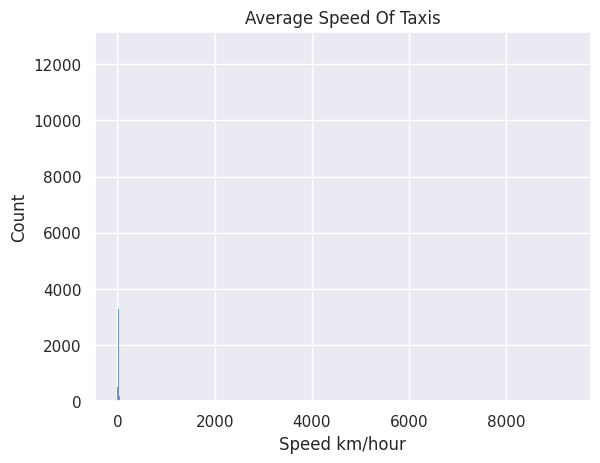

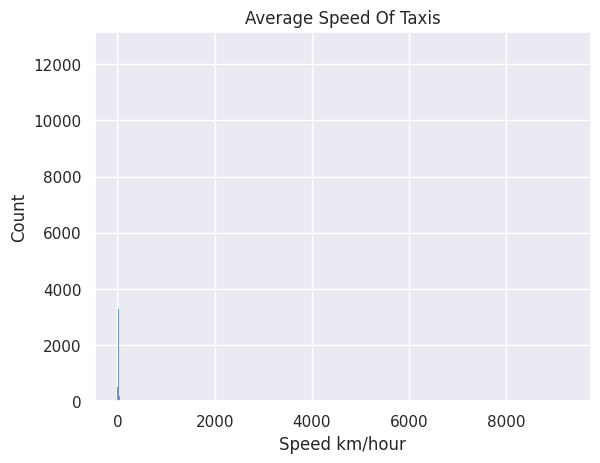

In [126]:
avg_speed = X_train["avg_speed"] = X_train["haversine"] / (np.expm1(y_train) / 3600)
plt.title("Average Speed Of Taxis")
plt.xlabel("Speed km/hour")

ax = sns.histplot(avg_speed)
# ax.set_xscale("log")

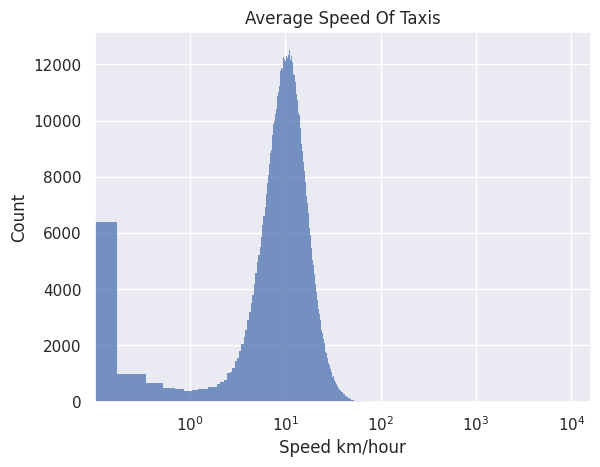

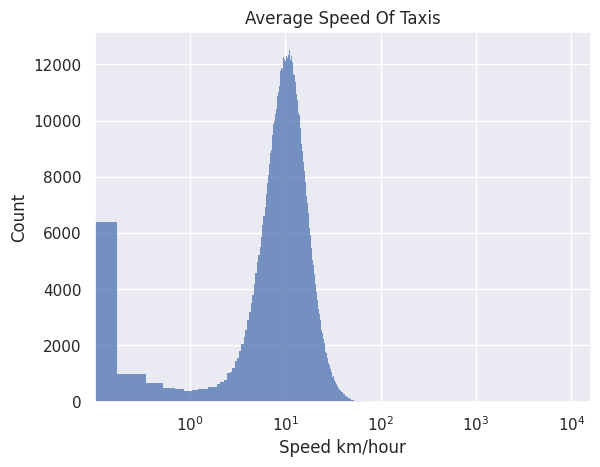

In [127]:
plt.title("Average Speed Of Taxis")
plt.xlabel("Speed km/hour")

ax = sns.histplot(avg_speed)
ax.set_xscale("log")

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [128]:
np.quantile(avg_speed, .9999)

125.11296614972098

125.11296614972098

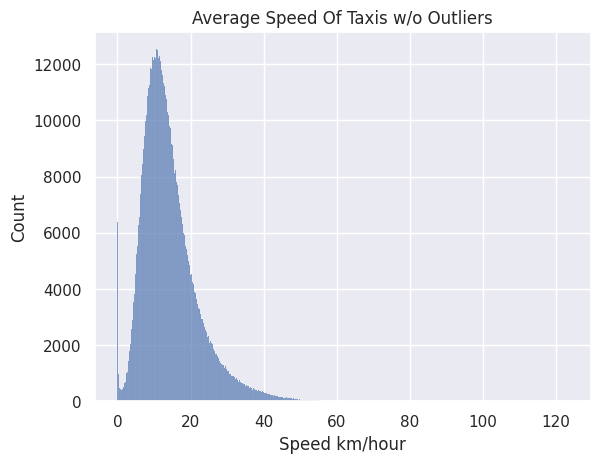

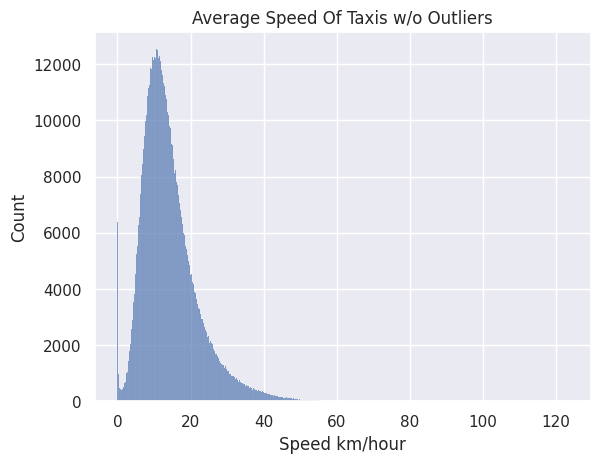

In [129]:
reasonable_avg_speed = avg_speed[ avg_speed < np.quantile(avg_speed, .9999) ]

plt.title("Average Speed Of Taxis w/o Outliers")
plt.xlabel("Speed km/hour")

ax = sns.histplot(reasonable_avg_speed)

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<ipython-input-41-b52d9dd5aa83>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medians = X_train.groupby(['weekday', 'hour']).median()["avg_speed"].unstack()


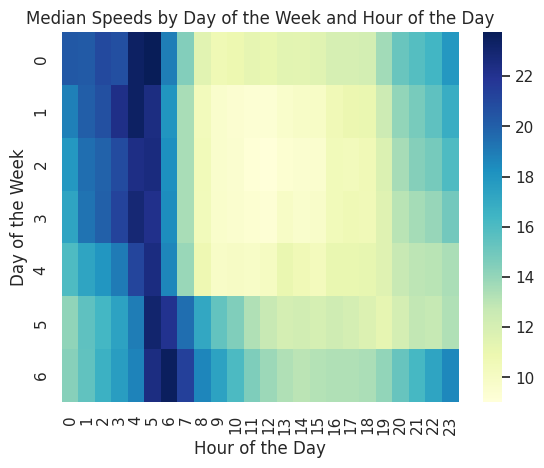

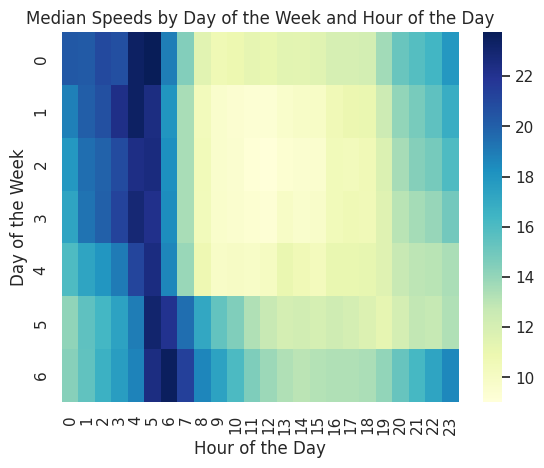

In [130]:
# Calculate the median speeds
medians = X_train.groupby(['weekday', 'hour']).median()["avg_speed"].unstack()

# Plot the heatmap
sns.heatmap(medians, cmap='YlGnBu')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Median Speeds by Day of the Week and Hour of the Day')

# Show the plot
plt.show()


Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

*Ответ*: Скорость расчитывается из дистанции (которая есть в X) И из времени поездки (которую мы будем предсказывать). У нас нет возможности знать ту переменную, которую мы будем предсказывать.

In [131]:
X_train = X_train.drop(columns="avg_speed")

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

*Ответ*: Скорость минимальна в рабочее время: пн-пт 7:00-19:00. Скорость максимальная в ночные часы 23:00-7:00, особенно в 4-5 ночи. в субботу немного сдвигается в позднюю ночь быстрое время. вероятно люди отдыхают по более поздним ночам, поэтому более занята дорога и больше пробок, следовательно меньше скорость в то же время.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [132]:
def traffic_status(df):
    work_days = range(5)
    work_hours = range(7, 20)

    rest_days = range(6, 8)
    sleep_hours = range(0, 7)

    late_sleep_hours = [h+2 for h in sleep_hours]

    df["busy_traffic"] = df["weekday"].isin(work_days) & df["hour"].isin(work_hours)
    df["free_traffic"] = (df["weekday"].isin(work_days) & df["hour"].isin(sleep_hours)) | (df["weekday"].isin(rest_days) & df["hour"].isin(late_sleep_hours))

    return df

traffic_status(X_train)
traffic_status(X_test).head()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
67251            2                1        -73.953575        40.766853   
1397037          1                1        -73.980736        40.742550   
1021088          1                1        -74.000076        40.743023   
951425           1                1        -73.989616        40.762753   
707883           1                1        -73.971497        40.755978   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
67251           -73.983360         40.761688                  N   
1397037         -73.986183         40.741192                  N   
1021088         -73.987762         40.765083                  N   
951425          -73.992088         40.744026                  N   
707883          -73.960808         40.769615                  N   

         rides_per_day  hour  month  weekday  dayofyear  anomaly_date  \
67251             7530    13      5        4        148         False   
1397037           8896    15      5        3        126         False   
1021088           7084     0      6        6        178         False   
951425            8138     6      3        6         66         False   
707883            7821    17      2        6         38         False   

         haversine  log_haversine  busy_traffic  free_traffic  
67251     2.573397       1.273517          True         False  
1397037   0.483136       0.394159          True         False  
1021088   2.663283       1.298360         False         False  
951425    2.092662       1.129032         False          True  
707883    1.763506       1.016500         False         False

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
67251            2                1        -73.953575        40.766853   
1397037          1                1        -73.980736        40.742550   
1021088          1                1        -74.000076        40.743023   
951425           1                1        -73.989616        40.762753   
707883           1                1        -73.971497        40.755978   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
67251           -73.983360         40.761688                  N   
1397037         -73.986183         40.741192                  N   
1021088         -73.987762         40.765083                  N   
951425          -73.992088         40.744026                  N   
707883          -73.960808         40.769615                  N   

         rides_per_day  hour  month  weekday  dayofyear  anomaly_date  \
67251             7530    13      5        4        148         False   
1397037           8896    15      5        3        126         False   
1021088           7084     0      6        6        178         False   
951425            8138     6      3        6         66         False   
707883            7821    17      2        6         38         False   

         haversine  log_haversine  busy_traffic  free_traffic  
67251     2.573397       1.273517          True         False  
1397037   0.483136       0.394159          True         False  
1021088   2.663283       1.298360         False         False  
951425    2.092662       1.129032         False          True  
707883    1.763506       1.016500         False         False

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [133]:
# Аэропорт Элизабет (долгая поездка)
coord1 = ("40°41′33″N", "074°10′07″W")
# Аэропорт Кеннеди (долгая поездка)  40°38′23″N 73°46′44″W
coord2 = ("40°38′23″N", "73°46′44″W")
# SeaPlane Base аэропорт (долгая поездка) 40°46′30″N 73°52′30″W
coord3 = ("40°46′30″N", "73°52′30″W")

places = {
    "Elizabeth Airport": coord1,
    "Kennedy Airport": coord2,
    "SeaPlane Airport": coord3
}

# DMS to Decimal angle
def dms2dd(s):
    import re
    # example: s = """0°51'56.29"S"""
    degrees, minutes, seconds, direction = re.split('[°\′″]+', s)
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction in ('S','W'):
        dd*= -1
    return dd

places = {name: ( dms2dd(place[0]), dms2dd(place[1]) ) for (name, place) in places.items()}
print(places)

{'Elizabeth Airport': (40.692499999999995, -74.16861111111112), 'Kennedy Airport': (40.63972222222222, -73.77888888888889), 'SeaPlane Airport': (40.775, -73.875)}
{'Elizabeth Airport': (40.692499999999995, -74.16861111111112), 'Kennedy Airport': (40.63972222222222, -73.77888888888889), 'SeaPlane Airport': (40.775, -73.875)}


In [134]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'log_trip_duration',
       'pickup_date', 'rides_per_day', 'day_of_week', 'hour', 'month'],
      dtype='object')

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'log_trip_duration',
       'pickup_date', 'rides_per_day', 'day_of_week', 'hour', 'month'],
      dtype='object')

In [135]:
def create_interesting_points_features(df, places):
    kms_to_degree_ratio = 0.008
    kms_region = 4
    radius = kms_to_degree_ratio * (kms_region / 2)

    column_names = []
    for place, coords in places.items():
        plat, plong = coords[0], coords[1]
        # borders
        plat_min = plat - radius
        plat_max = plat + radius
        plong_min = plong - radius
        plong_max = plong + radius

        dep_name = f"Departed from {place}"
        arr_name = f"Arrived to {place}"
        df[dep_name] = (df["pickup_longitude"].between(plong_min, plong_max)) & (df["pickup_latitude"].between(plat_min, plat_max))
        df[arr_name] = (df["dropoff_longitude"].between(plong_min, plong_max)) & (df["dropoff_latitude"].between(plat_min, plat_max))

        column_names.extend([dep_name, arr_name])

    return df, column_names

_, interesting_points_col_names = create_interesting_points_features(X_train, places)
create_interesting_points_features(X_test, places)

print("Выезжающие из Аэропорта Элизабет (40.692499999999995, -74.16861111111112)\n")
show_circles_on_map(X_train[X_train["Departed from Elizabeth Airport"]], "pickup_latitude", "pickup_longitude", "purple")
# display( X_train[X_train["Departed from Elizabeth Airport"]].sample(5) )
# print("\n Обычные данные")
# display(X_train.sample(5))

Выезжающие из Аэропорта Элизабет (40.692499999999995, -74.16861111111112)



Выезжающие из Аэропорта Элизабет (40.692499999999995, -74.16861111111112)



Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

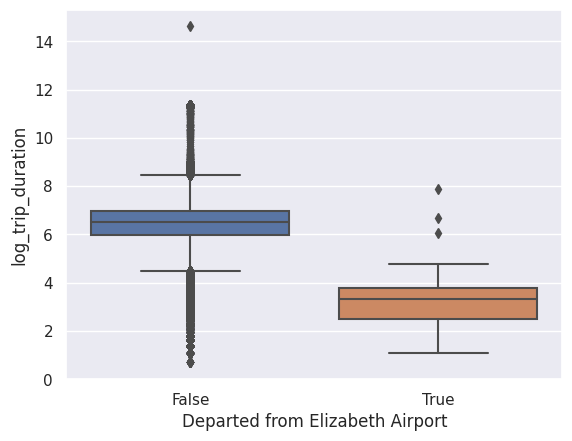

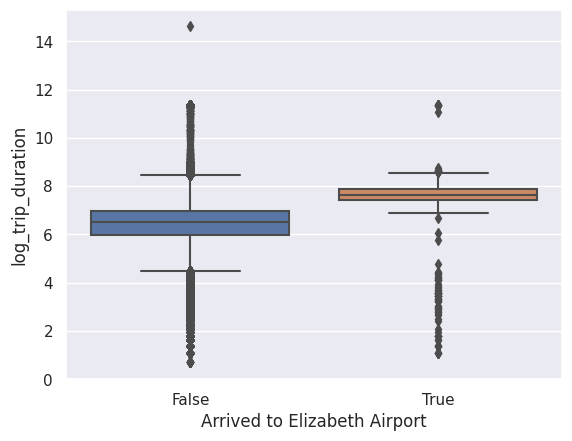

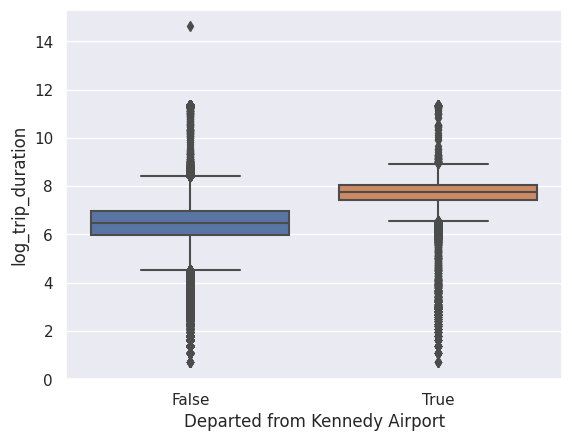

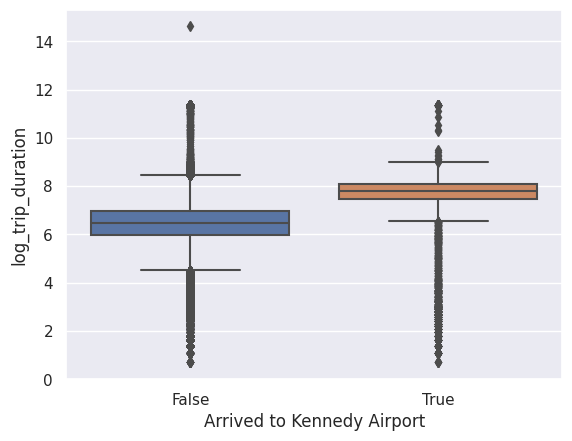

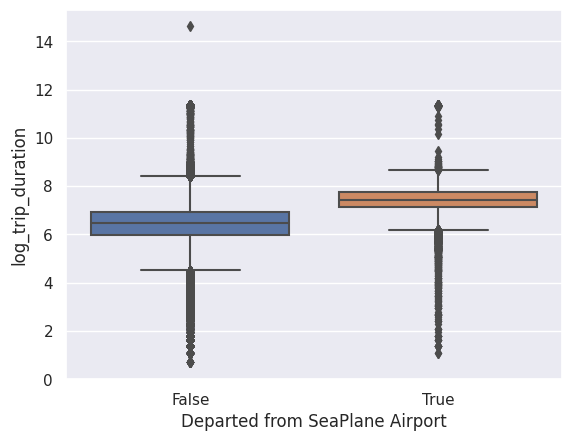

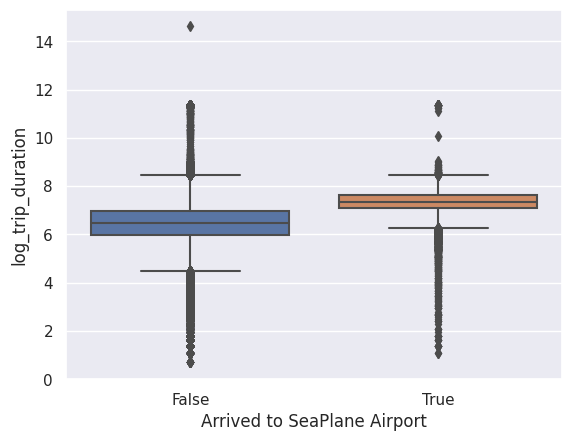

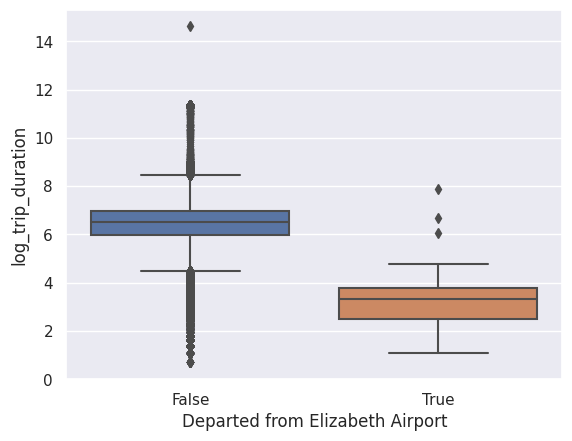

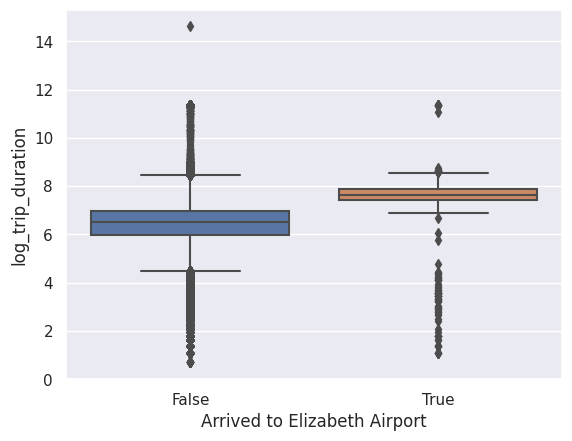

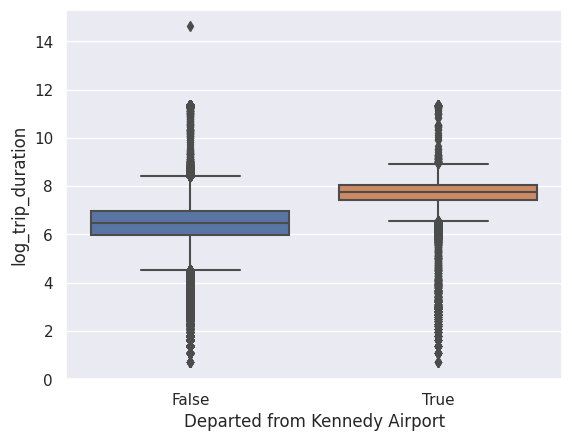

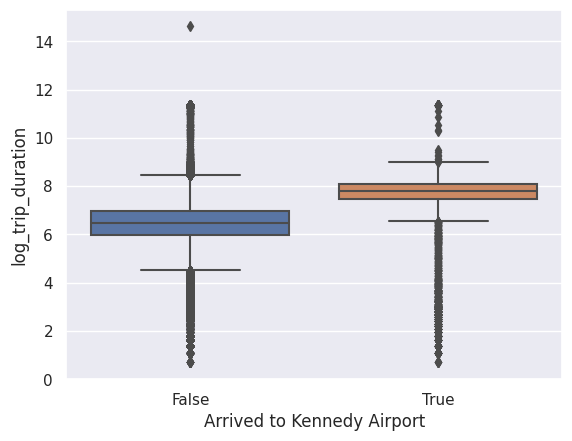

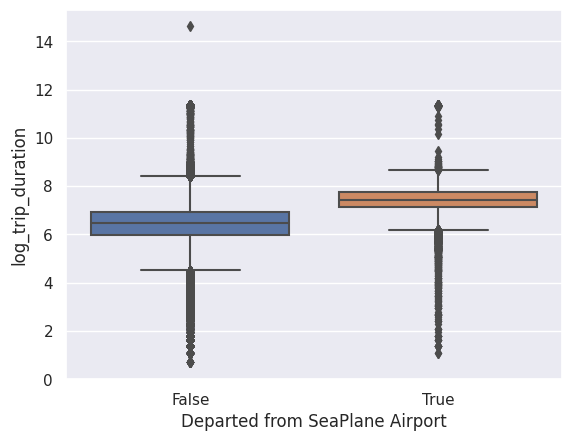

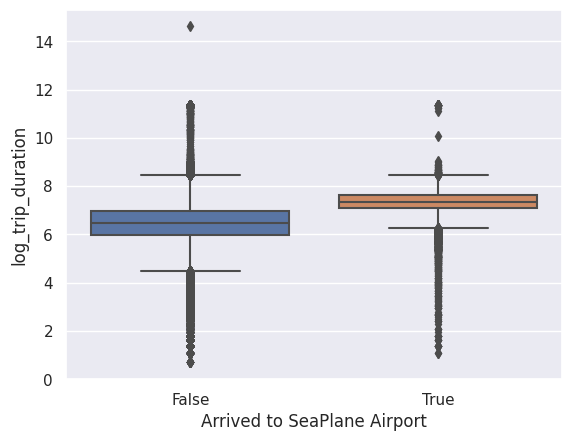

In [136]:
for col in interesting_points_col_names:
    sns.boxplot(y=y_train, x=X_train[col])
    plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

*Ответ*: Да, признаки действительно показывают разные значения. В большинстве своем время довольно разное. Я бы сказал даже без стат. тестов, что разница существенная

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

# Я сделал это для произвольного размера сетки, можно доп балл?))

In [137]:
from sklearn.base import BaseEstimator, TransformerMixin

"""
Вот что ChatGPT говорит насчет выполнения этой задачи, можно воспользоваться этим, как планом действий, а код напишу сам:

В методе fit, вы должны определить границы сетки на основе координат популярных точек поездок из обучающей выборки.
Вы также должны вычислить размеры ячеек для сетки.
В методе transform, используйте определенные границы и размеры ячеек для разделения координат начальных и конечных точек
поездок на соответствующие ячейки. Вы должны вернуть номера ячеек для начальных и конечных точек в качестве признаков.
Обработайте случаи, когда точки попадают за границы сетки, и присвойте им значение -1.
"""



# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, x, y):
        # we can define this area with left upper corner and right bottom corner

        # left upper corner
        self.long_min: float = -74.016
        self.lat_max: float = 40.795

        # right down corner
        self.long_max: float = -73.945
        self.lat_min: float = 40.7

        # shape of grid
        self.x: int = x
        self.y: int = y
        self.num_of_cells: int = x * y

        self.cell_width: float = abs(self.long_max - self.long_min) / x
        self.cell_height: float = abs(self.lat_max - self.lat_min) / y

        self.coord_mapping: dict = self.create_mapping()

    def create_mapping(self) -> dict:
        mapping = {}
        i = 0
        for y in range(self.y):
            for x in range(self.x):
                mapping[i] = {
                    "long_min": self.long_min + x * self.cell_width,
                     "long_max": self.long_min + (x + 1) * self.cell_width,
                     "lat_min": self.lat_max - (y + 1) * self.cell_height,
                     "lat_max": self.lat_max - y * self.cell_height
                    }
                i += 1
        assert i == self.num_of_cells

        return mapping

    def coords_to_index(self, lat_series, lon_series):
        index_df = pd.DataFrame()
        for i in range(self.num_of_cells):
            bs = self.coord_mapping[i]
            long_min, long_max, lat_min, lat_max = bs["long_min"], bs["long_max"], bs["lat_min"], bs["lat_max"]

            index_df[str(i)] = lon_series.between(long_min, long_max) & lat_series.between(lat_min, lat_max)

        index_matrix = index_df.to_numpy()

        # inverse one hot encoding
        index_array = np.argmax(index_matrix, axis = 1)
        # -1 for not occuring points
        index_array[index_array == 0] = -1

        return index_array



    def show_map(self):
        # you may want to visualize cells
        pass

    def fit(self, X=None, y=None):
        # your code here
        return self

    def transform(self, X, y=None):
        # your code here
        df = X.copy()

        pickup_lon = df["pickup_longitude"]
        pickup_lat = df["pickup_latitude"]

        dropoff_lon = df["dropoff_longitude"]
        dropoff_lat = df["dropoff_latitude"]

        df["pickup_index"] = self.coords_to_index(pickup_lat, pickup_lon)
        df["dropoff_index"] = self.coords_to_index(dropoff_lat, dropoff_lon)

        return df

In [138]:
mapper = MapGridTransformer(x=3, y=4)

X_train = mapper.transform(X_train)
X_test = mapper.transform(X_test)
X_train.sample(5)

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
51305            2                2        -73.965820        40.768566   
1311996          1                1        -73.948647        40.774239   
27523            1                1        -73.955132        40.780140   
484602           2                1        -73.990257        40.742081   
285966           2                1        -73.993462        40.721668   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
51305           -73.987656         40.738308                  N   
1311996         -73.974945         40.760479                  N   
27523           -73.978096         40.788197                  N   
484602          -73.982140         40.761131                  N   
285966          -74.000420         40.732479                  N   

         rides_per_day  hour  month  ...  busy_traffic  free_traffic  \
51305             8146    15      6  ...          True         False   
1311996           8558     9      4  ...          True         False   
27523             8468    16      4  ...          True         False   
484602            8301    20      4  ...         False         False   
285966            8126    19      6  ...          True         False   

         Departed from Elizabeth Airport  Arrived to Elizabeth Airport  \
51305                              False                         False   
1311996                            False                         False   
27523                              False                         False   
484602                             False                         False   
285966                             False                         False   

         Departed from Kennedy Airport  Arrived to Kennedy Airport  \
51305                            False                       False   
1311996                          False                       False   
27523                            False                       False   
484602                           False                       False   
285966                           False                       False   

         Departed from SeaPlane Airport  Arrived to SeaPlane Airport  \
51305                             False                        False   
1311996                           False                        False   
27523                             False                        False   
484602                            False                        False   
285966                            False                        False   

         pickup_index  dropoff_index  
51305               5              7  
1311996             2              4  
27523               2              1  
484602              7              4  
285966              9              6  

[5 rows x 25 columns]

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
51305            2                2        -73.965820        40.768566   
1311996          1                1        -73.948647        40.774239   
27523            1                1        -73.955132        40.780140   
484602           2                1        -73.990257        40.742081   
285966           2                1        -73.993462        40.721668   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
51305           -73.987656         40.738308                  N   
1311996         -73.974945         40.760479                  N   
27523           -73.978096         40.788197                  N   
484602          -73.982140         40.761131                  N   
285966          -74.000420         40.732479                  N   

         rides_per_day  hour  month  ...  busy_traffic  free_traffic  \
51305             8146    15      6  ...          True         False   
1311996           8558     9      4  ...          True         False   
27523             8468    16      4  ...          True         False   
484602            8301    20      4  ...         False         False   
285966            8126    19      6  ...          True         False   

         Departed from Elizabeth Airport  Arrived to Elizabeth Airport  \
51305                              False                         False   
1311996                            False                         False   
27523                              False                         False   
484602                             False                         False   
285966                             False                         False   

         Departed from Kennedy Airport  Arrived to Kennedy Airport  \
51305                            False                       False   
1311996                          False                       False   
27523                            False                       False   
484602                           False                       False   
285966                           False                       False   

         Departed from SeaPlane Airport  Arrived to SeaPlane Airport  \
51305                             False                        False   
1311996                           False                        False   
27523                             False                        False   
484602                            False                        False   
285966                            False                        False   

         pickup_index  dropoff_index  
51305               5              7  
1311996             2              4  
27523               2              1  
484602              7              4  
285966              9              6  

[5 rows x 25 columns]

In [139]:
show_circles_on_map(X_train[X_train["pickup_index"].isin([4])].head(1000), "pickup_latitude", "pickup_longitude", "purple")

In [140]:
show_circles_on_map(X_train[(X_train["pickup_index"] % 2 == 1) & (X_train["pickup_index"] > -1)].head(1000), "pickup_latitude", "pickup_longitude", "purple")

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [141]:
X_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'rides_per_day', 'hour', 'month', 'weekday', 'dayofyear',
       'anomaly_date', 'haversine', 'log_haversine', 'busy_traffic',
       'free_traffic', 'Departed from Elizabeth Airport',
       'Arrived to Elizabeth Airport', 'Departed from Kennedy Airport',
       'Arrived to Kennedy Airport', 'Departed from SeaPlane Airport',
       'Arrived to SeaPlane Airport', 'pickup_index', 'dropoff_index'],
      dtype='object')

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'rides_per_day', 'hour', 'month', 'weekday', 'dayofyear',
       'anomaly_date', 'haversine', 'log_haversine', 'busy_traffic',
       'free_traffic', 'Departed from Elizabeth Airport',
       'Arrived to Elizabeth Airport', 'Departed from Kennedy Airport',
       'Arrived to Kennedy Airport', 'Departed from SeaPlane Airport',
       'Arrived to SeaPlane Airport', 'pickup_index', 'dropoff_index'],
      dtype='object')

In [142]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pd.DataFrame(X_train.nunique()).T)

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0          2               10             21304            42451   

   dropoff_longitude  dropoff_latitude  store_and_fwd_flag  rides_per_day  \
0              30749             57868                   2            175   

   hour  month  weekday  dayofyear  anomaly_date  haversine  log_haversine  \
0    24      6        7        182             2    1016559        1016559   

   busy_traffic  free_traffic  Departed from Elizabeth Airport  \
0             2             2                                2   

   Arrived to Elizabeth Airport  Departed from Kennedy Airport  \
0                             2                              2   

   Arrived to Kennedy Airport  Departed from SeaPlane Airport  \
0                           2                               2   

   Arrived to SeaPlane Airport  pickup_index  dropoff_index  
0                            2            12             12

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0          2               10             21304            42451   

   dropoff_longitude  dropoff_latitude  store_and_fwd_flag  rides_per_day  \
0              30749             57868                   2            175   

   hour  month  weekday  dayofyear  anomaly_date  haversine  log_haversine  \
0    24      6        7        182             2    1016559        1016559   

   busy_traffic  free_traffic  Departed from Elizabeth Airport  \
0             2             2                                2   

   Arrived to Elizabeth Airport  Departed from Kennedy Airport  \
0                             2                              2   

   Arrived to Kennedy Airport  Departed from SeaPlane Airport  \
0                           2                               2   

   Arrived to SeaPlane Airport  pickup_index  dropoff_index  
0                            2            12             12

In [143]:
train_cols, test_cols = set(list(X_train.columns)), set(list(X_test.columns))

# assert train_cols == test_cols, train_cols.difference(test_cols)

ignore_columns = ["store_and_fwd_flag", "vendor_id", "passenger_count"]

# Drop non-log haversine
X_train = X_train.drop(columns=["haversine"])
X_test = X_test.drop(columns=["haversine"])

categorical_features = ["hour", "month", "weekday", "anomaly_date", "busy_traffic",
                        "free_traffic", "pickup_index", "dropoff_index"] + interesting_points_col_names
numerical_features = list(X_train.drop(columns=categorical_features + ignore_columns).columns)

print(f"Categorical features: {categorical_features}\nNumerical features: {list(numerical_features)}")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("grid_map", MapGridTransformer(x=3,y=4), numerical_features),
        ("cat", OneHotEncoder(), categorical_features)
    ]
)

model_2 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge())
    ]
)

model_2.fit(X_train, y_train)

_ = score_model(model_2, X_test, y_test)

Categorical features: ['hour', 'month', 'weekday', 'anomaly_date', 'busy_traffic', 'free_traffic', 'pickup_index', 'dropoff_index', 'Departed from Elizabeth Airport', 'Arrived to Elizabeth Airport', 'Departed from Kennedy Airport', 'Arrived to Kennedy Airport', 'Departed from SeaPlane Airport', 'Arrived to SeaPlane Airport']
Numerical features: ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'rides_per_day', 'dayofyear', 'log_haversine']
RMSE : 0.4723368415186159

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
Categorical features: ['hour', 'month', 'weekday', 'anomaly_date', 'busy_traffic', 'free_traffic', 'pickup_index', 'dropoff_index', 'Departed from Elizabeth Airport', 'Arrived to Elizabeth Airport', 'Departed from Kennedy Airport', 'Arrived to Kennedy Airport', 'Departed from SeaPlane Airport', 'Arrived to SeaPlane Airport']
Numerical features: ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'rid

In [144]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(X_train.head())

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
726291           2                3        -73.985306        40.758072   
1011258          2                1        -73.785477        40.648693   
178551           2                1        -73.985046        40.744678   
551461           2                1        -73.990410        40.740749   
1434271          1                1        -74.000122        40.759937   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
726291          -74.003189         40.735050                  N   
1011258         -73.980850         40.782776                  N   
178551          -74.005768         40.748451                  N   
551461          -73.985405         40.731525                  N   
1434271         -73.993713         40.752361                  N   

         rides_per_day  hour  month  weekday  dayofyear  anomaly_date  \
726291            8442    11      2        2         55         False   
1011258           7879    16      3        1         68         False   
178551            9796     4      4        5        100         False   
551461            9309    16      2        5         44         False   
1434271           7738    18      3        6         73         False   

         log_haversine  busy_traffic  free_traffic  \
726291        1.378842          True         False   
1011258       3.144721          True         False   
178551        1.027944         False         False   
551461        0.746195         False         False   
1434271       0.693408         False         False   

         Departed from Elizabeth Airport  Arrived to Elizabeth Airport  \
726291                             False                         False   
1011258                            False                         False   
178551                             False                         False   
551461                             False                         False   
1434271                            False                         False   

         Departed from Kennedy Airport  Arrived to Kennedy Airport  \
726291                           False                       False   
1011258                           True                       False   
178551                           False                       False   
551461                           False                       False   
1434271                          False                       False   

         Departed from SeaPlane Airport  Arrived to SeaPlane Airport  \
726291                            False                        False   
1011258                           False                        False   
178551                            False                        False   
551461                            False                        False   
1434271                           False                        False   

         pickup_index  dropoff_index  
726291              4              6  
1011258            -1              1  
178551              7              3  
551461              7              7  
1434271             3              3

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
726291           2                3        -73.985306        40.758072   
1011258          2                1        -73.785477        40.648693   
178551           2                1        -73.985046        40.744678   
551461           2                1        -73.990410        40.740749   
1434271          1                1        -74.000122        40.759937   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  \
726291          -74.003189         40.735050                  N   
1011258         -73.980850         40.782776                  N   
178551          -74.005768         40.748451                  N   
551461          -73.985405         40.731525                  N   
1434271         -73.993713         40.752361                  N   

         rides_per_day  hour  month  weekday  dayofyear  anomaly_date  \
726291            8442    11      2        2         55         False   
1011258           7879    16      3        1         68         False   
178551            9796     4      4        5        100         False   
551461            9309    16      2        5         44         False   
1434271           7738    18      3        6         73         False   

         log_haversine  busy_traffic  free_traffic  \
726291        1.378842          True         False   
1011258       3.144721          True         False   
178551        1.027944         False         False   
551461        0.746195         False         False   
1434271       0.693408         False         False   

         Departed from Elizabeth Airport  Arrived to Elizabeth Airport  \
726291                             False                         False   
1011258                            False                         False   
178551                             False                         False   
551461                             False                         False   
1434271                            False                         False   

         Departed from Kennedy Airport  Arrived to Kennedy Airport  \
726291                           False                       False   
1011258                           True                       False   
178551                           False                       False   
551461                           False                       False   
1434271                          False                       False   

         Departed from SeaPlane Airport  Arrived to SeaPlane Airport  \
726291                            False                        False   
1011258                           False                        False   
178551                            False                        False   
551461                            False                        False   
1434271                           False                        False   

         pickup_index  dropoff_index  
726291              4              6  
1011258            -1              1  
178551              7              3  
551461              7              7  
1434271             3              3

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

*Ответ*: vendor_id возможно имеется ввиду 2 компании. их машины могут быть разной скорости, а также могут развозить людей в разных регионах (следовательно с разными пробками и дистанциями). passenger_count - обычно на больших поездках сразу едет много людей (дачи, пикники, другой город), эта переменная "коррелирует" с характером поездки. store_and_fwd_flag - указывает на то, было ли соединение с сервером, перед отправкой вендеру, когда поездка была завершена. когда машина едет в далекие края, там часто бывает что нет соединения, поэтому эта переменная может хорошо коррелировать с временем поездки.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [145]:
X_train[["vendor_id", "passenger_count", "store_and_fwd_flag"]].nunique(), X_train[["vendor_id", "passenger_count", "store_and_fwd_flag"]].head()

(vendor_id              2
 passenger_count       10
 store_and_fwd_flag     2
 dtype: int64,
          vendor_id  passenger_count store_and_fwd_flag
 726291           2                3                  N
 1011258          2                1                  N
 178551           2                1                  N
 551461           2                1                  N
 1434271          1                1                  N)

(vendor_id              2
 passenger_count       10
 store_and_fwd_flag     2
 dtype: int64,
          vendor_id  passenger_count store_and_fwd_flag
 726291           2                3                  N
 1011258          2                1                  N
 178551           2                1                  N
 551461           2                1                  N
 1434271          1                1                  N)

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

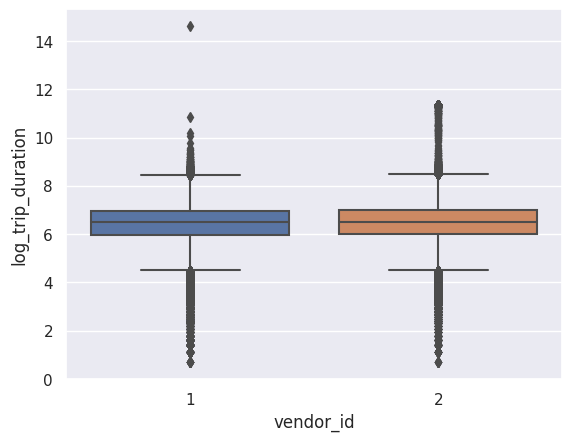

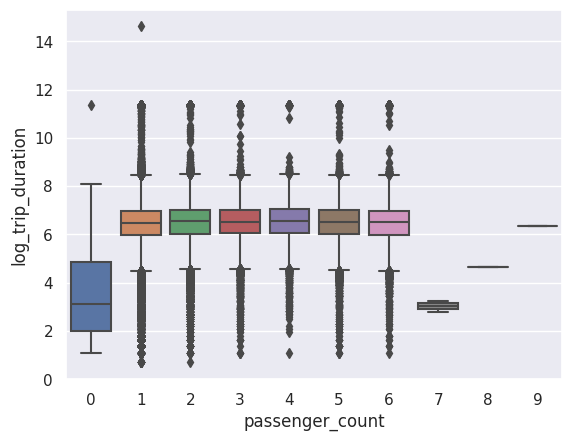

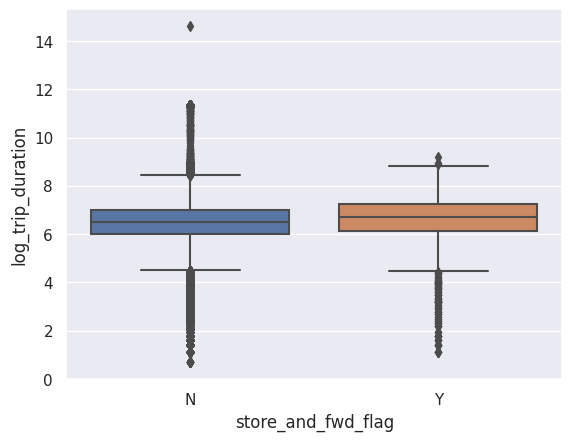

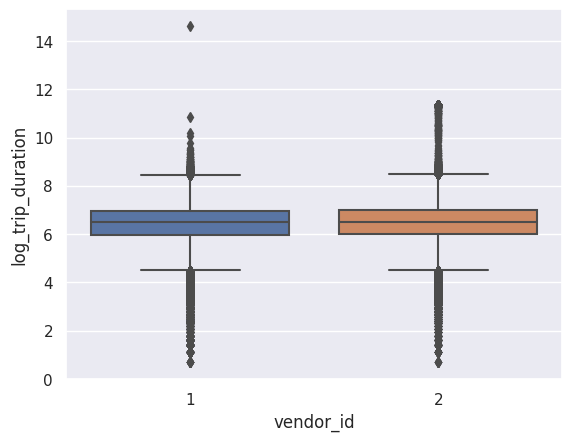

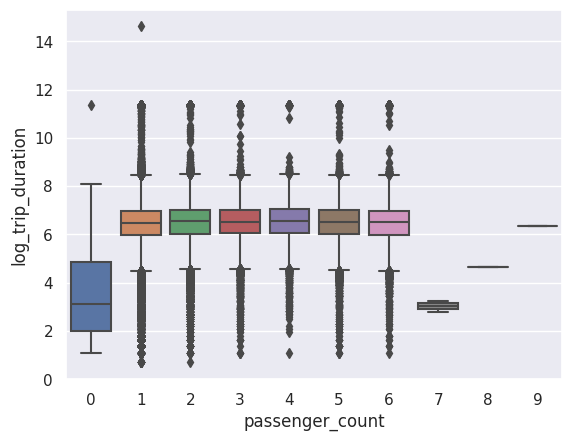

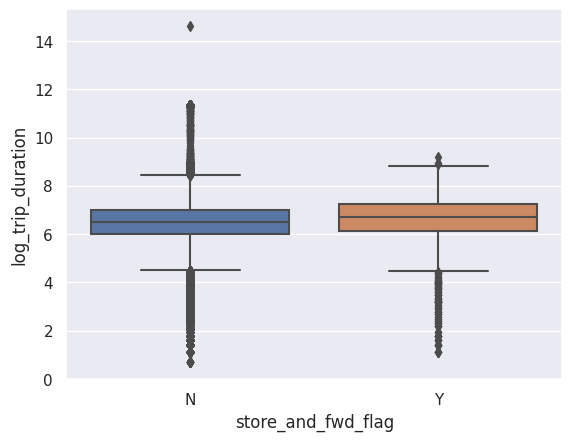

In [146]:
cat_int_features = ["vendor_id", "passenger_count", "store_and_fwd_flag"]

for col in cat_int_features:
    sns.boxplot(y=y_train, x=X_train[col])
    plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [147]:
def transform_vendor_fwd_flag(df):
    df["vendor_id"] = df["vendor_id"].map({1: 0, 2: 1})
    df["store_and_fwd_flag"] = df["store_and_fwd_flag"].map({"N": 0, "Y": 1})
    return df

transform_vendor_fwd_flag(X_train)
transform_vendor_fwd_flag(X_test)[cat_int_features].head()

vendor_id  passenger_count  store_and_fwd_flag
67251            1                1                   0
1397037          0                1                   0
1021088          0                1                   0
951425           0                1                   0
707883           0                1                   0

vendor_id  passenger_count  store_and_fwd_flag
67251            1                1                   0
1397037          0                1                   0
1021088          0                1                   0
951425           0                1                   0
707883           0                1                   0

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?
*Ответ*: Думаю не будут

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [148]:
categorical_features = ["hour", "month", "weekday", "anomaly_date", "busy_traffic",
                        "free_traffic", "pickup_index", "dropoff_index"] + interesting_points_col_names + ignore_columns
numerical_features = list(X_train.drop(columns=categorical_features).columns)


print(f"Categorical features: {categorical_features}\nNumerical features: {list(numerical_features)}")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("grid_map", MapGridTransformer(x=3,y=4), numerical_features),
        ("cat", OneHotEncoder(), categorical_features)
    ]
)

model_3 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge())
    ]
)

model_3.fit(X_train, y_train)

# Модель улучшилась совсем чуть-чуть RMSE: 0.4686 -> 0.4681
_ = score_model(model_3, X_test, y_test)

Categorical features: ['hour', 'month', 'weekday', 'anomaly_date', 'busy_traffic', 'free_traffic', 'pickup_index', 'dropoff_index', 'Departed from Elizabeth Airport', 'Arrived to Elizabeth Airport', 'Departed from Kennedy Airport', 'Arrived to Kennedy Airport', 'Departed from SeaPlane Airport', 'Arrived to SeaPlane Airport', 'store_and_fwd_flag', 'vendor_id', 'passenger_count']
Numerical features: ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'rides_per_day', 'dayofyear', 'log_haversine']
RMSE : 0.4718179364407233

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
Categorical features: ['hour', 'month', 'weekday', 'anomaly_date', 'busy_traffic', 'free_traffic', 'pickup_index', 'dropoff_index', 'Departed from Elizabeth Airport', 'Arrived to Elizabeth Airport', 'Departed from Kennedy Airport', 'Arrived to Kennedy Airport', 'Departed from SeaPlane Airport', 'Arrived to SeaPlane Airport', 'store_and_fwd_flag', 'vendor_id', 'passenger_count

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

In [149]:
X_train=X_train.drop(columns=ignore_columns)
X_test=X_test.drop(columns=ignore_columns)
X_test.sample(1)

pickup_longitude  pickup_latitude  dropoff_longitude  \
314523        -73.984932        40.756279         -73.864601   

        dropoff_latitude  rides_per_day  hour  month  weekday  dayofyear  \
314523         40.770222           6353    10      1        6          3   

        anomaly_date  ...  busy_traffic  free_traffic  \
314523         False  ...         False         False   

        Departed from Elizabeth Airport  Arrived to Elizabeth Airport  \
314523                            False                         False   

        Departed from Kennedy Airport  Arrived to Kennedy Airport  \
314523                          False                       False   

        Departed from SeaPlane Airport  Arrived to SeaPlane Airport  \
314523                           False                         True   

        pickup_index  dropoff_index  
314523             4             -1  

[1 rows x 21 columns]

pickup_longitude  pickup_latitude  dropoff_longitude  \
314523        -73.984932        40.756279         -73.864601   

        dropoff_latitude  rides_per_day  hour  month  weekday  dayofyear  \
314523         40.770222           6353    10      1        6          3   

        anomaly_date  ...  busy_traffic  free_traffic  \
314523         False  ...         False         False   

        Departed from Elizabeth Airport  Arrived to Elizabeth Airport  \
314523                            False                         False   

        Departed from Kennedy Airport  Arrived to Kennedy Airport  \
314523                          False                       False   

        Departed from SeaPlane Airport  Arrived to SeaPlane Airport  \
314523                           False                         True   

        pickup_index  dropoff_index  
314523             4             -1  

[1 rows x 21 columns]

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

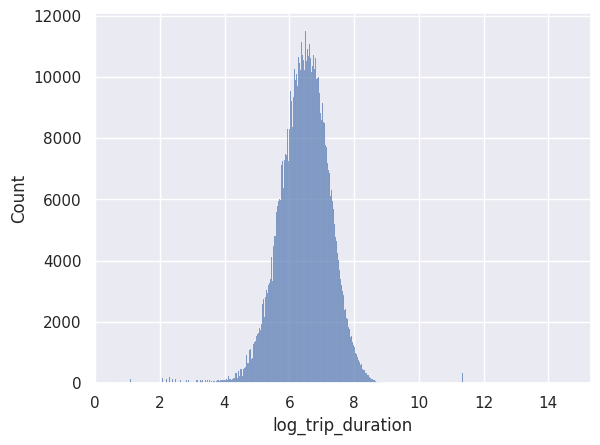

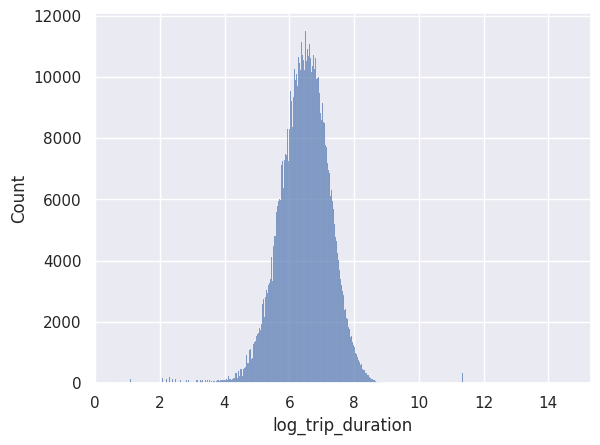

In [150]:
#log_trip_duration
sns.histplot(x=y_train)
plt.show()

<Axes: xlabel='log_haversine', ylabel='Count'>

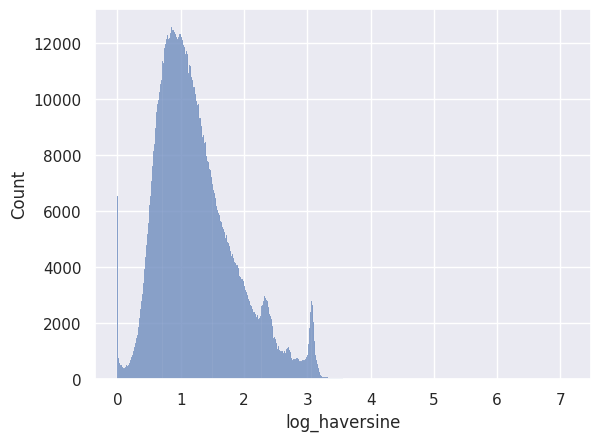

<Axes: xlabel='log_haversine', ylabel='Count'>

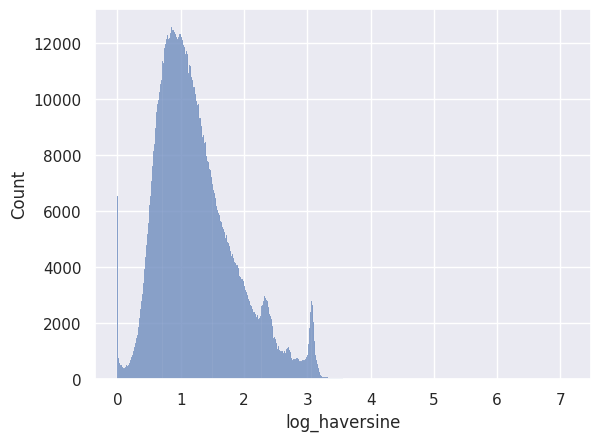

In [151]:
#distance
sns.histplot(x=X_train["log_haversine"])

Text(0, 0.5, 'Residual of regression')

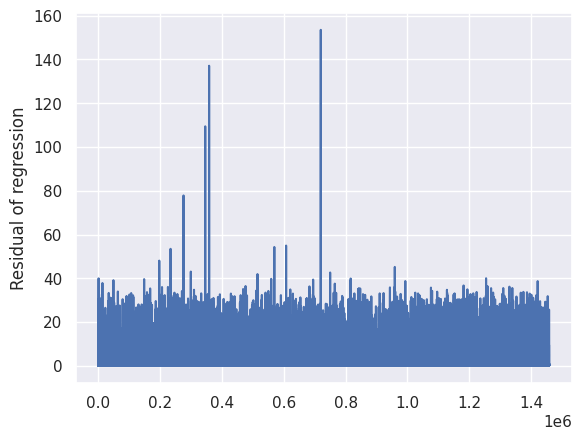

Text(0, 0.5, 'Residual of regression')

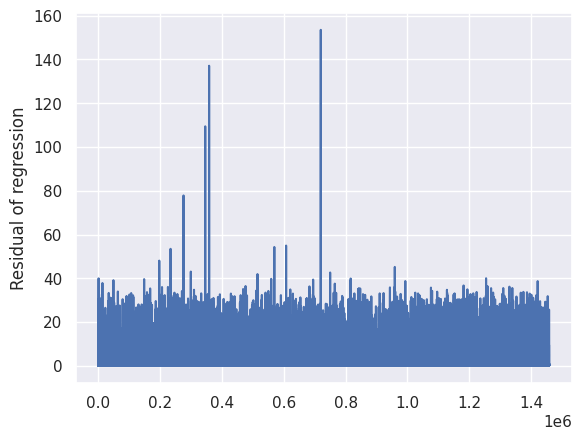

In [152]:
#big regression errors
y_pred = model_2.predict(X_train)
errors = (y_pred - y_train) ** 2
sns.lineplot(errors)
plt.ylabel("Residual of regression")

In [153]:
train_regression_outliers = errors > 1

print( len(train_regression_outliers[train_regression_outliers]) / len(train_regression_outliers) )
# X_train = X_train[~train_regression_outliers.index]

0.02771656627981
0.02771656627981


### Remove distant outliers

### Много поездок имеют дистанцию близкую к нулю, может это несостоявшиеся поездки? Распределение выглядит би-модальным, кажется это не просто так

<Axes: xlabel='log_trip_duration', ylabel='Count'>

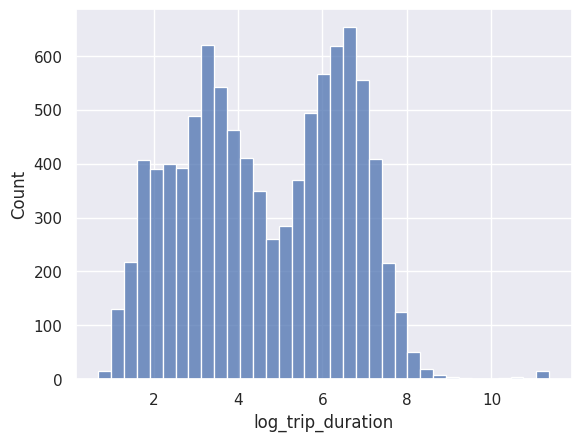

<Axes: xlabel='log_trip_duration', ylabel='Count'>

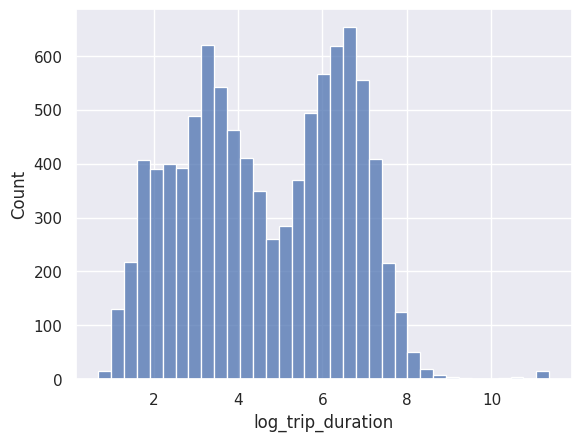

In [154]:
X_train_zero_dist = X_train[X_train["log_haversine"] < 0.1]
log_duration_zero_dist = y_train[X_train_zero_dist.index]
sns.histplot(data=X_train_zero_dist, x=log_duration_zero_dist)

In [155]:
# drop where log distance is more than 3.5
X_train = X_train.drop(X_train[X_train["log_haversine"] > 3.5].index)
y_train = y_train.drop(X_train[X_train["log_haversine"] > 3.5].index)

In [156]:
# sns.kdeplot(data=X_train_zero_dist, y="pickup_index", x="dropoff_index")

# 99% of points really represent what they should
print( len( X_train_zero_dist[X_train_zero_dist["pickup_index"] == X_train_zero_dist["dropoff_index"]] ) / len(X_train_zero_dist) )

X_train["ride_canceled"] = X_train["log_haversine"] < 0.1
y_train = y_train[X_train.index]

X_test["ride_canceled"] = X_test["log_haversine"] < 0.1

0.9920861031972144
0.9920861031972144


### Remove duration outliers

In [157]:
print("Some useful stats")
print(np.std(y_train) * 2 + y_train.mean(), np.expm1(4) / 3600, np.expm1(9) / 3600)

# drop where duration is more than 2 hours
X_train = X_train.drop(y_train[y_train > 9].index)
y_train = y_train[X_train.index]

Some useful stats
8.056632402702794 0.014888375009206731 2.25057886877094
Some useful stats
8.056632402702794 0.014888375009206731 2.25057886877094


### Remove regression outliers

In [158]:
print("Shape before drop: ", X_train.shape)

X_train = X_train.drop(train_regression_outliers[train_regression_outliers].index, errors="ignore")
y_train = y_train[X_train.index]

print("Shape after drop: ", X_train.shape)

Shape before drop:  (1019246, 22)
Shape after drop:  (992484, 22)
Shape before drop:  (1019246, 22)
Shape after drop:  (992484, 22)


In [159]:
# to not restart the notebook every time

X_train_buff = X_train.copy()
y_train_buff = y_train.copy()

X_train = X_train_buff.copy()
y_train = y_train_buff.copy()

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

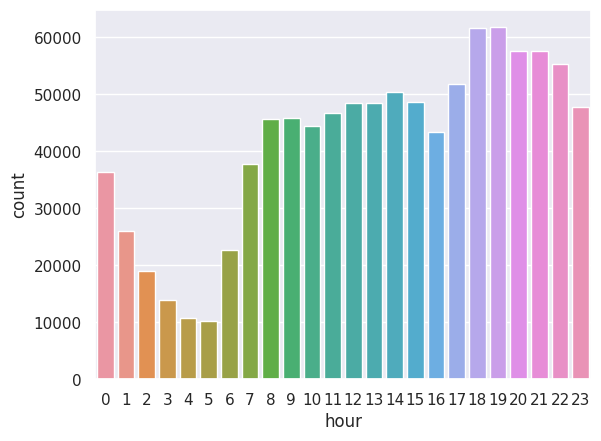

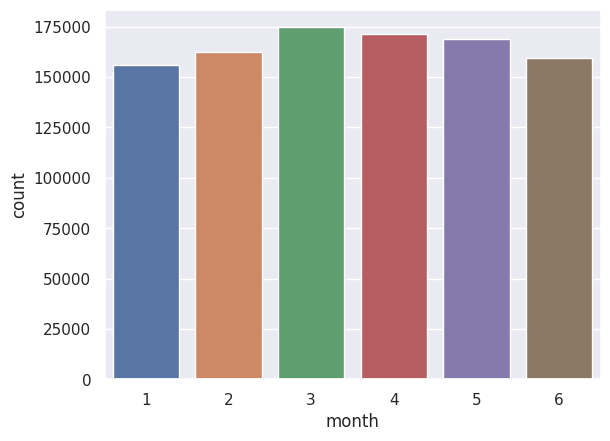

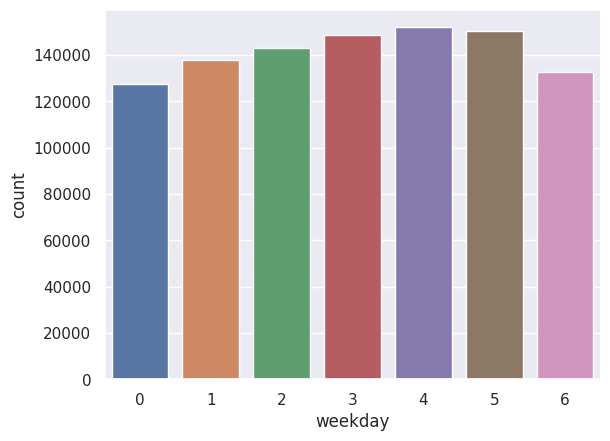

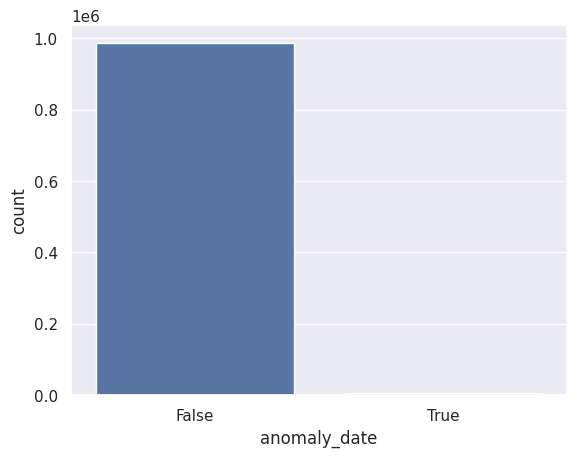

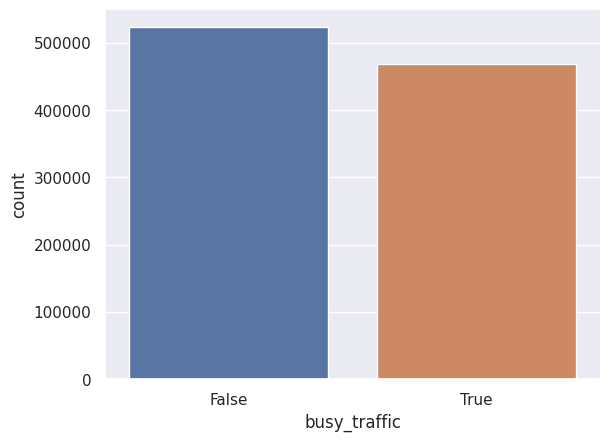

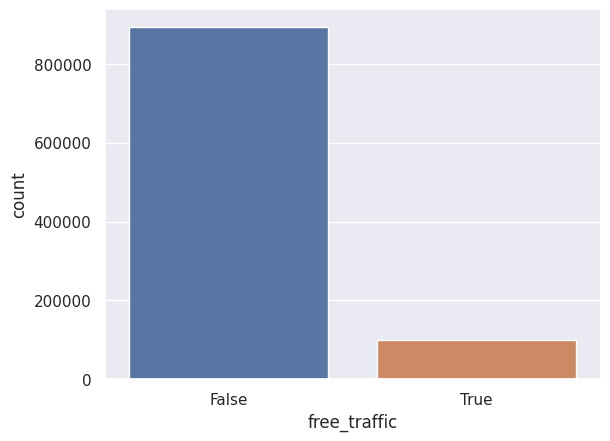

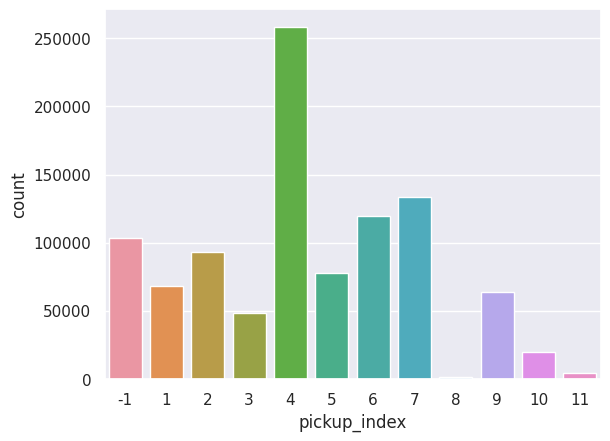

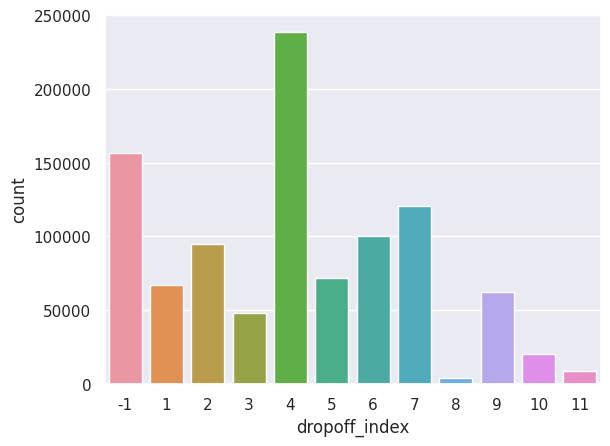

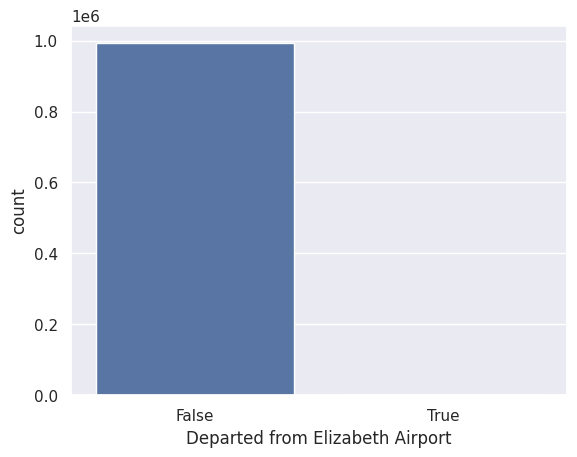

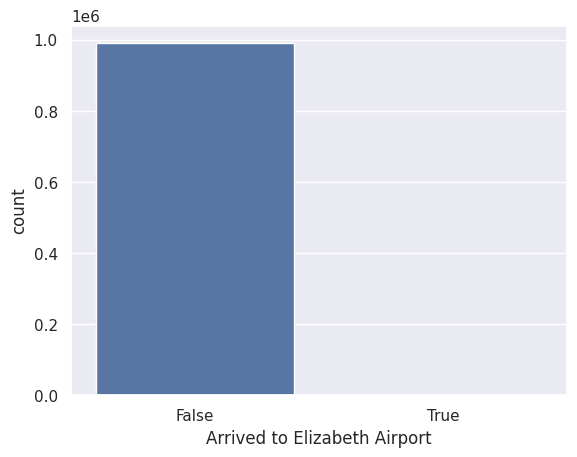

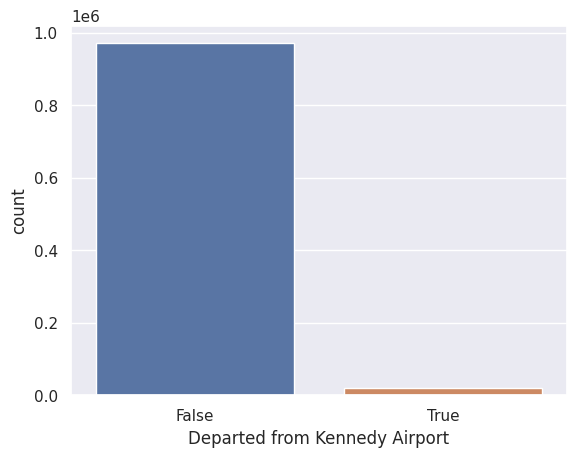

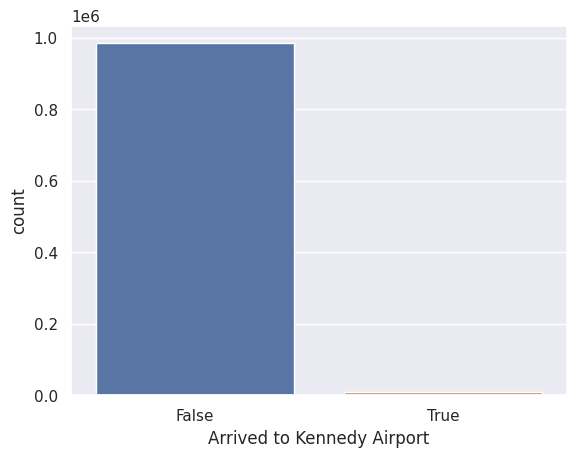

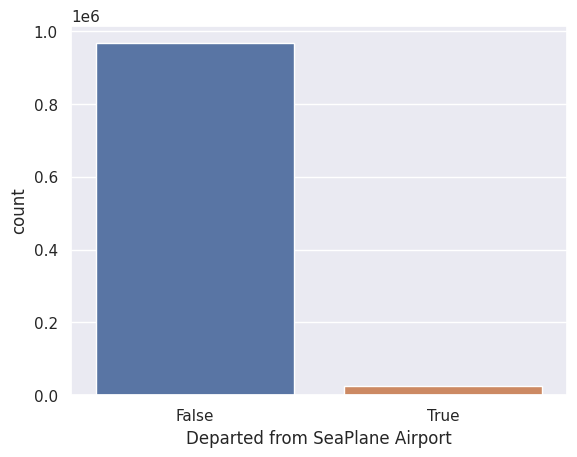

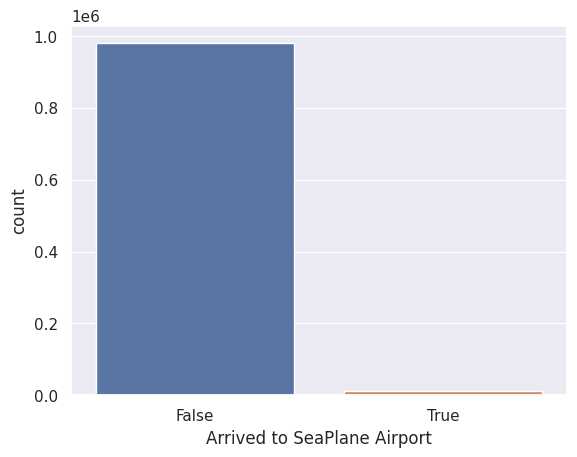

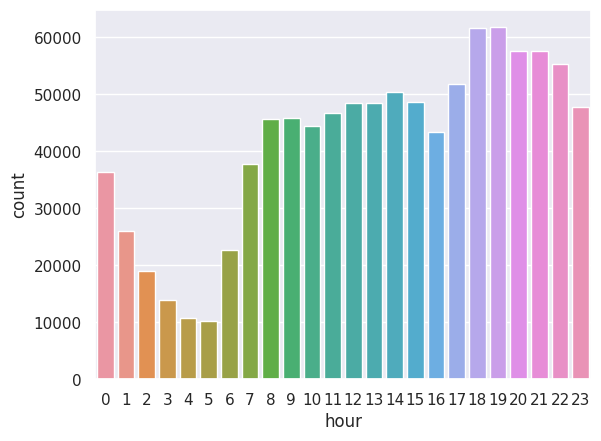

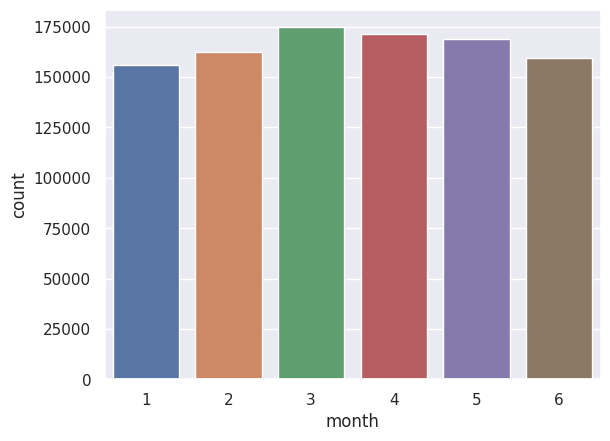

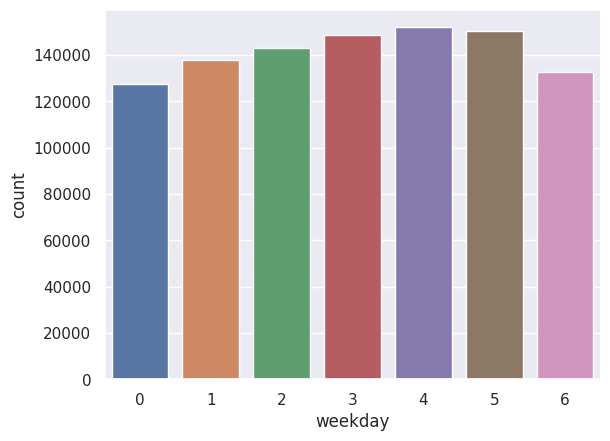

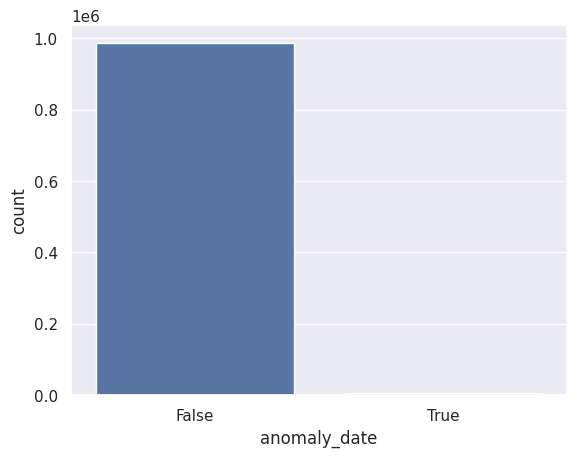

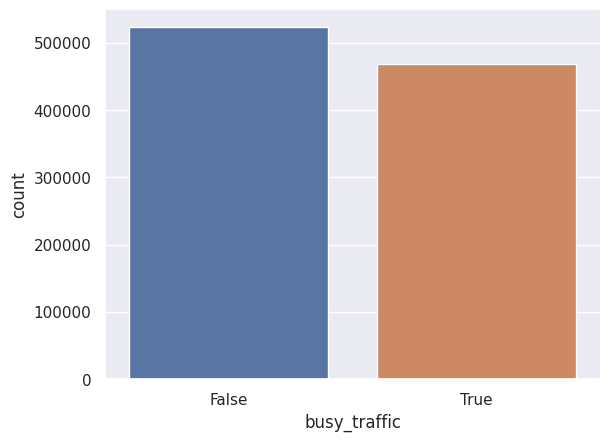

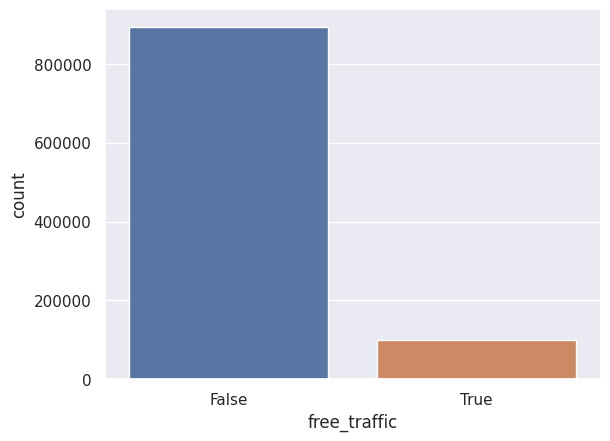

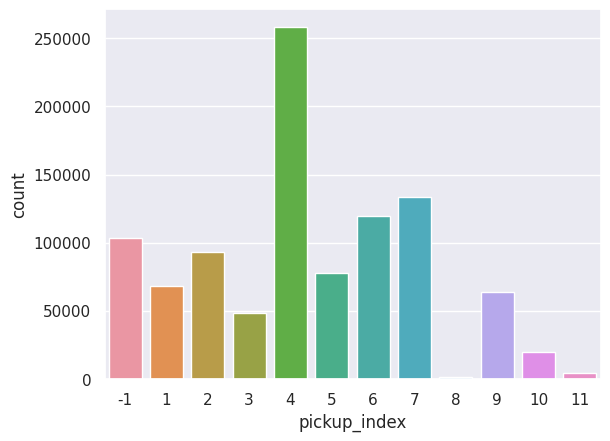

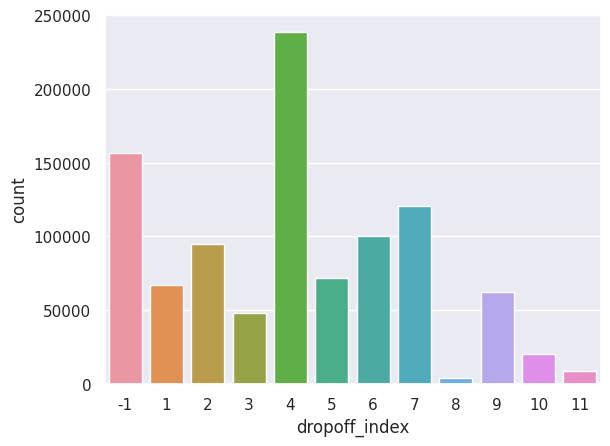

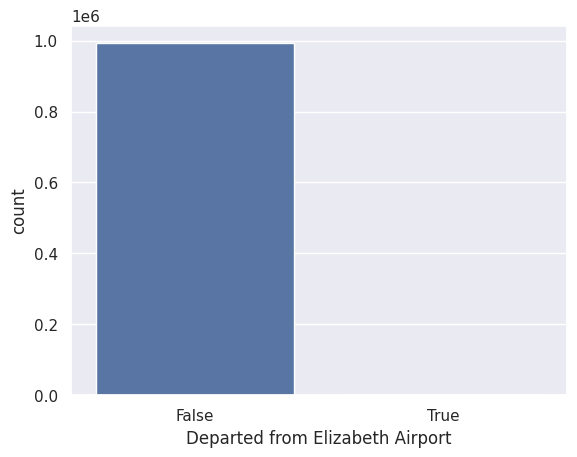

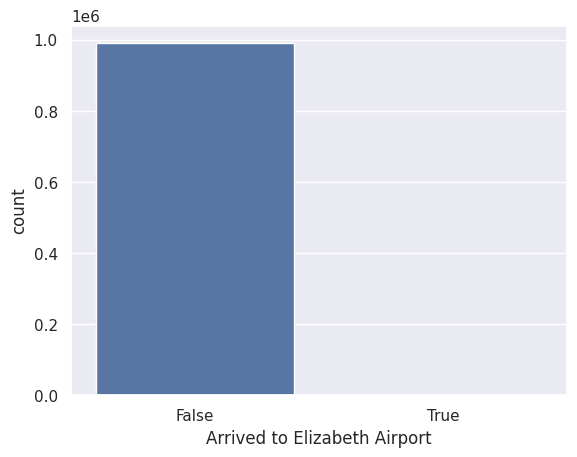

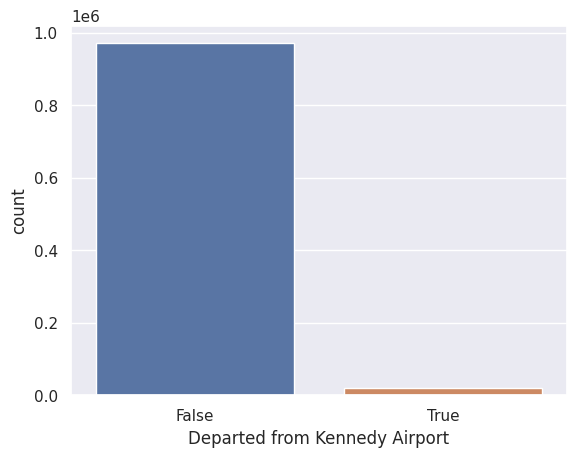

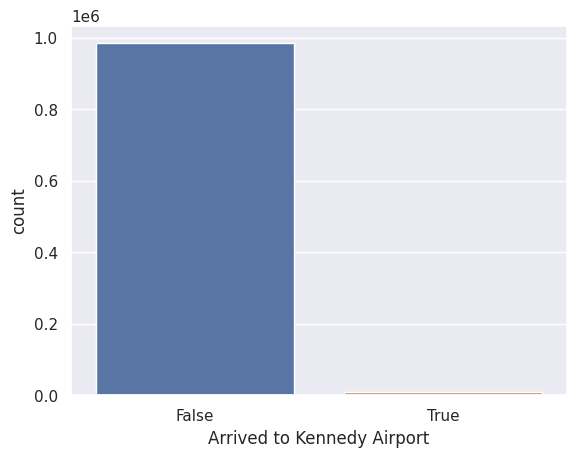

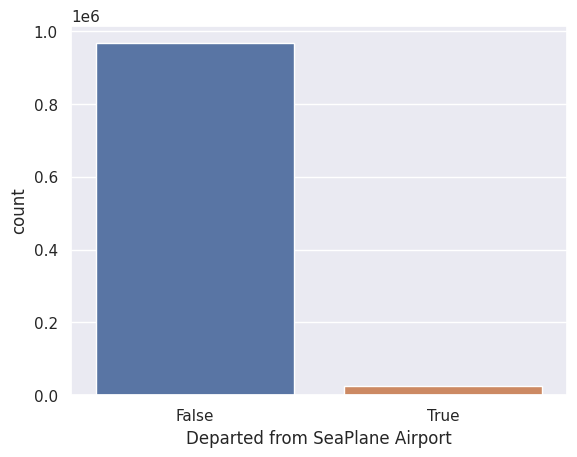

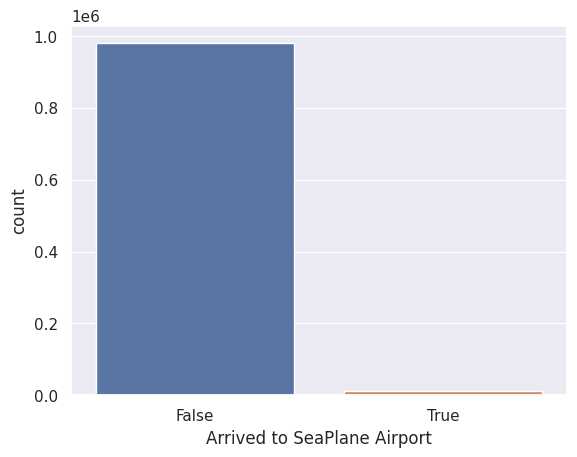

In [160]:
# No really rare categories were found (except pickup/dropoff indeces, but feels like it would be harmful for the model to aggregate them)

categorical_features = ["hour", "month", "weekday", "anomaly_date", "busy_traffic",
                        "free_traffic", "pickup_index", "dropoff_index"] + interesting_points_col_names

for f in categorical_features:
    g = sns.countplot(data=X_train, x=f)
    plt.show()

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [161]:
def pipeline(numerical_features, categorical_features, regressor, params={} ,data=[X_train, y_train, X_test, y_test]):

    # print(f"Categorical features: {categorical_features}\nNumerical features: {list(numerical_features)}")

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numerical_features),
            ("grid_map", MapGridTransformer(x=3,y=4), numerical_features),
            ("cat", OneHotEncoder(), categorical_features)
        ]
    )

    model = Pipeline(
        steps=[
            ('preprocessor', preprocessor),
            ('regressor', regressor(**params))
        ]

    )

    model.fit(X_train, y_train)

    # Модель улучшилась совсем чуть-чуть RMSE: 0.4686 -> 0.4681
    y_pred, error = score_model(model, X_test, y_test)

    return model, y_pred, error

categorical_features = ["hour", "month", "weekday", "anomaly_date", "busy_traffic",
                        "free_traffic", "pickup_index", "dropoff_index", "ride_canceled"] + interesting_points_col_names
numerical_features = list(X_train.drop(columns=categorical_features).columns)

model, predictions, error = pipeline(numerical_features, categorical_features, Ridge)

RMSE : 0.4727638663227805

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.4727638663227805

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)


## Error became bigger on 0.01 RMSE approximately :/

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [162]:
print(len(categorical_features))
ohe = OneHotEncoder()
ohe.fit(X_train)
transf = ohe.transform(X_train)
print(transf.shape[1])

print("For X_train shape: ", X_train.shape)

print(f"Cat. feature space increased in {transf.shape[1] / len(categorical_features)} times!")

15
1140667
For X_train shape:  (992484, 22)
Cat. feature space increased in 76044.46666666666 times!
15
1140667
For X_train shape:  (992484, 22)
Cat. feature space increased in 76044.46666666666 times!


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [163]:
from sklearn.linear_model import Lasso

# На дефолтных параметрах, Ridge лучше
model, predictions, error = pipeline(numerical_features, categorical_features, Lasso)

RMSE : 0.7955804866041919

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.7955804866041919

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)


Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [164]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [165]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-5, 3, 10)
print(alphas)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("grid_map", MapGridTransformer(x=3,y=4), numerical_features),
        ("cat", OneHotEncoder(), categorical_features)
    ]
)

ridge = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge())
    ]
)

data=[X_train, y_train, X_val, y_val]

def find_optimal_alpha(regressor, alphas):
    # regressor - not initialized class
    errors = []
    for a in alphas:
        params = {"alpha": a}
        model, y_pred, error = pipeline(numerical_features, categorical_features, regressor, params=params, data=data)
        errors.append((error, model, a))

    error_values = [e[0] for e in errors]
    min_err_index = np.argmin(error_values)
    return (*errors[min_err_index], errors)


error_ridge, model_ridge, alpha_ridge, ridge_stat = find_optimal_alpha(Ridge, alphas)
print(f"Error: {error_ridge}, alpha: {alpha_ridge}")

[1.00000000e-05 7.74263683e-05 5.99484250e-04 4.64158883e-03
 3.59381366e-02 2.78255940e-01 2.15443469e+00 1.66810054e+01
 1.29154967e+02 1.00000000e+03]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.22709e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RMSE : 0.47275539137924494

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.50346e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RMSE : 0.4727553912530762

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.47275539027620783

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.4727553827133531

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.4727553241977632

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.47275487356998963

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.47275152543662485

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.4727321480083062

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.4726967012607057

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.4728205992879422

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
Error: 0.4726967012607057, alpha: 129.15496650148827
[1.00000000e-05 7.74263683e-05 5.99484250e-04 4.64158883e-03
 3.59381366e-02 2.78255940e-01 2.15443469e+00 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.22709e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RMSE : 0.47275539137924494

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.50346e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RMSE : 0.4727553912530762

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.47275539027620783

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.4727553827133531

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.4727553241977632

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.47275487356998963

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.47275152543662485

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.4727321480083062

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.4726967012607057

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.4728205992879422

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
Error: 0.4726967012607057, alpha: 129.15496650148827


In [166]:
error_lasso, model_lasso, alpha_lasso, lasso_stat = find_optimal_alpha(Lasso, alphas)
print(f"Error: {error_lasso}, alpha: {alpha_lasso}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.845e+04, tolerance: 4.003e+01
  model = cd_fast.enet_coordinate_descent(


RMSE : 0.4727070058252126

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.47275906317174266

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.4740004564299137

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.48576379392936286

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.5100287317811214

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.605853183368804

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.7963012917721205

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.7964205609248315

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.7964205609248315

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
RMSE : 0.7964205609248315

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)
Error: 0.4727070058252126, alpha: 1e-05


KeyboardInterrupt: ignored

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
def count_zero_weights(i):
    lasso_tuple = lasso_stat[i]
    lasso_example = lasso_tuple[1]
    lasso_model = lasso_example.steps[1][1]
    coefs = lasso_model.coef_

    zero_w = coefs[coefs==0]
    alpha = lasso_model.alpha
    err = lasso_tuple[0]

    print("total num of coefs: ", len(coefs))
    # print("zero weigts:", zero_w)
    return len(zero_w), alpha, err

count_zero_weights(0)

total num of coefs:  97


(13, 1e-05, 0.4727070058252126)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

weights_df = pd.DataFrame(columns=["n_zero_weights", "alpha", "rmse"])

for i in range(len(lasso_stat)):
    num_zero_weight, alpha, err_value = count_zero_weights(i)

    new_row = {"n_zero_weights": num_zero_weight, "alpha": alpha, "rmse": err_value}
    weights_df = weights_df.append(new_row, ignore_index=True)

weights_df = weights_df.set_index("alpha")
weights_df.head()

total num of coefs:  97
total num of coefs:  97
total num of coefs:  97
total num of coefs:  97
total num of coefs:  97
total num of coefs:  97
total num of coefs:  97
total num of coefs:  97
total num of coefs:  97
total num of coefs:  97


n_zero_weights      rmse
alpha                             
0.000010            13.0  0.472707
0.000077            21.0  0.472759
0.000599            32.0  0.474000
0.004642            79.0  0.485764
0.035938            90.0  0.510029

<Axes: xlabel='alpha'>

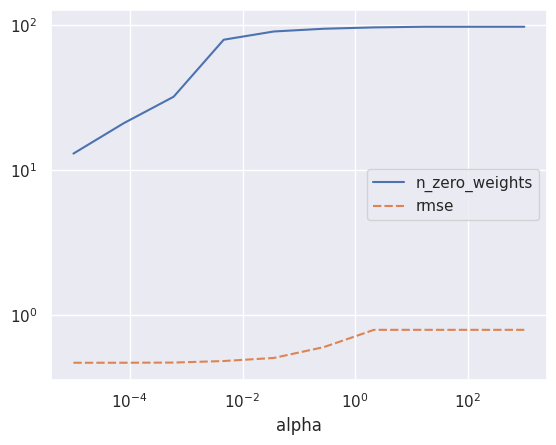

In [ ]:
plt.xscale("log")
plt.yscale("log")
sns.lineplot(data=weights_df)

<Axes: xlabel='alpha'>

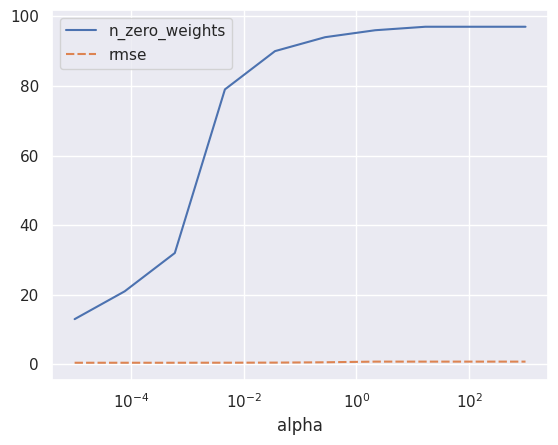

In [ ]:
plt.xscale("log")
sns.lineplot(data=weights_df)

In [ ]:
print(f"""потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков: """)
min_alpha = weights_df.n_zero_weights[weights_df.n_zero_weights > 45].index.tolist()[0]
print( weights_df[weights_df.index == min_alpha]["rmse"] )

print("\n\nBest prediction was:", 0.4727070058252126)

print("\n\nТак что в принципе 0.01 rmse для этой задачи надо потерять, вероятно это того стоит")

потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков: 
alpha
0.004642    0.485764
Name: rmse, dtype: float64


Best prediction was: 0.4727070058252126


Так что в принципе 0.01 rmse для этой задачи надо потерять, вероятно это того стоит


<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

*Ответ*: линейная модель может только ставить коэффициенты для переменных, она не может построить сложную функцию, в которых обе точки используюся. Признак полезный так как некоторые пары могут иметь особенное время поездки

In [ ]:
X_train.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'rides_per_day', 'hour', 'month', 'weekday',
       'dayofyear', 'anomaly_date', 'log_haversine', 'busy_traffic',
       'free_traffic', 'Departed from Elizabeth Airport',
       'Arrived to Elizabeth Airport', 'Departed from Kennedy Airport',
       'Arrived to Kennedy Airport', 'Departed from SeaPlane Airport',
       'Arrived to SeaPlane Airport', 'pickup_index', 'dropoff_index',
       'ride_canceled'],
      dtype='object')

In [ ]:
fitted_routes = []

def make_route_features(df, fitted_routes, fit=False):
    df["from_to"] = df.apply(lambda x: f'{x["pickup_index"]}->{x["dropoff_index"]}', axis=1)

    routes_by_count = df.groupby("from_to").count()
    # display(routes_by_count.sort_values(by="hour", ascending=True).head(5))
    most_popular_routes = routes_by_count.sort_values(by="hour", ascending=False).head(100).index.tolist()
    print(abs(len(most_popular_routes) - len(routes_by_count)))

    if fit:
        fitted_routes = most_popular_routes
        df["from_to"] = np.vectorize(lambda x: -1 if x not in most_popular_routes else x)(df["from_to"])
    else:
        df["from_to"] = np.vectorize(lambda x: -1 if x not in fitted_routes else x)(df["from_to"])

    return df, fitted_routes

_, fitted_routes = make_route_features(X_train, fitted_routes, fit=True)
X_test, fitted_routes = make_route_features(X_test, fitted_routes)
X_test.head()

44
44


pickup_longitude  pickup_latitude  dropoff_longitude  \
67251          -73.953575        40.766853         -73.983360   
1397037        -73.980736        40.742550         -73.986183   
1021088        -74.000076        40.743023         -73.987762   
951425         -73.989616        40.762753         -73.992088   
707883         -73.971497        40.755978         -73.960808   

         dropoff_latitude  rides_per_day  hour  month  weekday  dayofyear  \
67251           40.761688           7530    13      5        4        148   
1397037         40.741192           8896    15      5        3        126   
1021088         40.765083           7084     0      6        6        178   
951425          40.744026           8138     6      3        6         66   
707883          40.769615           7821    17      2        6         38   

         anomaly_date  ...  Departed from Elizabeth Airport  \
67251           False  ...                            False   
1397037         False  ...                            False   
1021088         False  ...                            False   
951425          False  ...                            False   
707883          False  ...                            False   

         Arrived to Elizabeth Airport  Departed from Kennedy Airport  \
67251                           False                          False   
1397037                         False                          False   
1021088                         False                          False   
951425                          False                          False   
707883                          False                          False   

         Arrived to Kennedy Airport  Departed from SeaPlane Airport  \
67251                         False                           False   
1397037                       False                           False   
1021088                       False                           False   
951425                        False                           False   
707883                        False                           False   

         Arrived to SeaPlane Airport  pickup_index  dropoff_index  \
67251                          False             5              4   
1397037                        False             7              7   
1021088                        False             6              4   
951425                         False             4              7   
707883                         False             4              5   

         ride_canceled  from_to  
67251            False     5->4  
1397037          False     7->7  
1021088          False     6->4  
951425           False     4->7  
707883           False     4->5  

[5 rows x 23 columns]

In [ ]:
X_test[X_test["from_to"] == "-1"].shape

(4681, 23)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
categorical_features = ["hour", "month", "weekday", "anomaly_date", "busy_traffic",
                        "free_traffic", "pickup_index", "dropoff_index", "ride_canceled", "from_to"] + interesting_points_col_names
numerical_features = X_train.drop(columns=categorical_features).columns.tolist()

model, predictions, error = pipeline(numerical_features, categorical_features, Ridge)
model

RMSE : 0.46393103847647377

 for data with Mean, std: (6.467165357805837, 0.7962054808981027)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['pickup_longitude',
                                                   'pickup_latitude',
                                                   'dropoff_longitude',
                                                   'dropoff_latitude',
                                                   'rides_per_day', 'dayofyear',
                                                   'log_haversine']),
                                                 ('grid_map',
                                                  MapGridTransformer(x=3, y=4),
                                                  ['pickup_longitude',
                                                   'pickup_latitude',
                                                   'dropoff_longitude',
                                                   'dropoff_latitude',
                                                   'rides_per_day', 'dayof...
                                                 ('cat', OneHotEncoder(),
                                                  ['hour', 'month', 'weekday',
                                                   'anomaly_date',
                                                   'busy_traffic',
                                                   'free_traffic',
                                                   'pickup_index',
                                                   'dropoff_index',
                                                   'ride_canceled', 'from_to',
                                                   'Departed from Elizabeth '
                                                   'Airport',
                                                   'Arrived to Elizabeth '
                                                   'Airport',
                                                   'Departed from Kennedy '
                                                   'Airport',
                                                   'Arrived to Kennedy Airport',
                                                   'Departed from SeaPlane '
                                                   'Airport',
                                                   'Arrived to SeaPlane '
                                                   'Airport'])])),
                ('regressor', Ridge())])

Ну здорово! Получилось лучшее качество из всех вариантов

In [ ]:
alphas = np.logspace(-5, 3, 20)
print(alphas)

# Пробовал оптимизацию, но это уже лучший вариант...
# err, model, alpha, ridge_stat = find_optimal_alpha(Ridge, alphas)
# print(f"Error: {err}, alpha: {alpha}")

[1.00000000e-05 2.63665090e-05 6.95192796e-05 1.83298071e-04
 4.83293024e-04 1.27427499e-03 3.35981829e-03 8.85866790e-03
 2.33572147e-02 6.15848211e-02 1.62377674e-01 4.28133240e-01
 1.12883789e+00 2.97635144e+00 7.84759970e+00 2.06913808e+01
 5.45559478e+01 1.43844989e+02 3.79269019e+02 1.00000000e+03]


In [167]:
"Ошибка модели в секундах примерно:", np.expm1(0.463), "\n ну вряд ли конечно правда такая ошибка..."

('Ошибка модели в секундах примерно:',
 0.5888333424160801,
 '\n ну вряд ли конечно правда такая ошибка...')

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

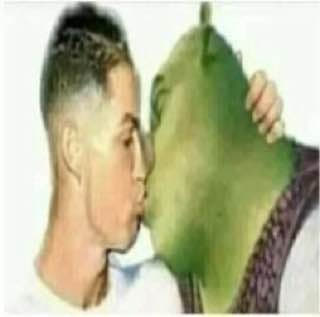 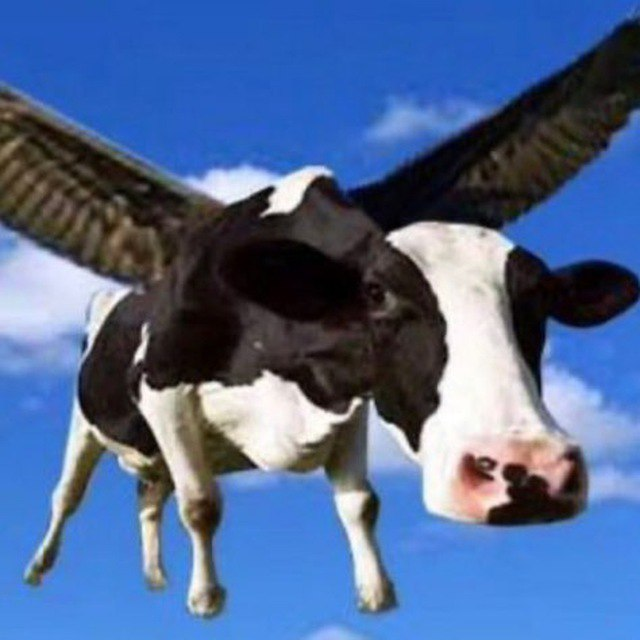